# Data Sci Eng Methods
## Assignment 2 - AutoML
### Data Set
NIFTY-50 Stock Market Data (2000 - 2021)

### Abstract
The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 30th April, 2021.


Note: The dataset contains stock data for 50 stocks


### Columns

Date - Trade Data

Symbol - Name of stock

Series - Type of security

Prev Close - Previous data closing price

Open - Opening price for the day

High - Highest price for the day

Low - Lowest price for the day

Last - Last trade price

Closes - Closing price

VWAP - Volume-weighted average price (a ratio of the cumulative share price to the cumulative volume traded over a given time period)

Volume - volume trades for the day

Turnover - The turnover ratio is ratio of sellers to buyers of a stock

Trades - Number of Trades

Deliverable Volume - Amount of deliverable volume

%Deliverble - Percentage of shares that were delivered

Note: All price are in Rupees

## Aim:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

* Coding professionalism?

In [1]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=2bf89401f3903a94ca50c2acfface9ca50933ee9f0fab102eca89d9c7f1d4c89
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o



#### What is H20?
H2O is an open-source machine learning platform that is designed for data scientists and machine learning practitioners to build, train, and deploy machine learning models. It is primarily used for tasks such as data preprocessing, feature engineering, model selection, and model evaluation.

In [151]:
# import libraries
import h2o
from h2o.automl import H2OAutoML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx3prz90m
  JVM stdout: /tmp/tmpx3prz90m/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpx3prz90m/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_6nqm0c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
# Import dataset
url = "https://raw.githubusercontent.com/ChaudharyAnshul/AutoMl_StockDataset/main/Dataset/NIFTY50_all.csv"
data = pd.read_csv(url)

In [5]:
# print the the dataset
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [6]:
#Print all the Unique stock names
symbol = data["Symbol"].unique()
print(symbol)
print("Unique stock values: ", len(symbol))

['MUNDRAPORT' 'ADANIPORTS' 'ASIANPAINT' 'UTIBANK' 'AXISBANK' 'BAJAJ-AUTO'
 'BAJAJFINSV' 'BAJAUTOFIN' 'BAJFINANCE' 'BHARTI' 'BHARTIARTL' 'BPCL'
 'BRITANNIA' 'CIPLA' 'COALINDIA' 'DRREDDY' 'EICHERMOT' 'GAIL' 'GRASIM'
 'HCLTECH' 'HDFC' 'HDFCBANK' 'HEROHONDA' 'HEROMOTOCO' 'HINDALC0'
 'HINDALCO' 'HINDLEVER' 'HINDUNILVR' 'ICICIBANK' 'INDUSINDBK' 'INFOSYSTCH'
 'INFY' 'IOC' 'ITC' 'JSWSTL' 'JSWSTEEL' 'KOTAKMAH' 'KOTAKBANK' 'LT' 'M&M'
 'MARUTI' 'NESTLEIND' 'NTPC' 'ONGC' 'POWERGRID' 'RELIANCE' 'SBIN'
 'SHREECEM' 'SUNPHARMA' 'TELCO' 'TATAMOTORS' 'TISCO' 'TATASTEEL' 'TCS'
 'TECHM' 'TITAN' 'ULTRACEMCO' 'UNIPHOS' 'UPL' 'SESAGOA' 'SSLT' 'VEDL'
 'WIPRO' 'ZEETELE' 'ZEEL']
Unique stock values:  65


### Some of the stock are renamed over time

MUNDRAPORT -> ADANIPORTS

BAJAUTOFIN -> BAJFINANCE

BHARTI -> BHARTIARTL

HINDLEVER -> HINDUNILVR

JSWSTL -> JSWSTEEL

KOTAKMAH -> KOTAKBANK

TELCO -> TATAMOTORS

TISCO -> TATASTEEL

UNIPHOS -> UPL

SESAGOA -> SESAGOA -> VEDL

HINDALC0 -> HINDALCO

In [7]:
#replacing the values
replace = [
    ["MUNDRAPORT","ADANIPORTS"],
    ["BAJAUTOFIN","BAJFINANCE"],
    ["BHARTI","BHARTIARTL"],
    ["HINDLEVER","HINDUNILVR"],
    ["JSWSTL","JSWSTEEL"],
    ["KOTAKMAH","KOTAKBANK"],
    ["TELCO","TATAMOTORS"],
    ["TISCO","TATASTEEL"],
    ["SESAGOA","VEDL"],
    ["SESAGOA","VEDL"],
    ["HINDALC0","HINDALCO"],
    ["UNIPHOS","UPL"],
]
for i in replace:
    data.loc[ data["Symbol"] == i[0], "Symbol"] = i[1]

data["Symbol"].unique()

array(['ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK', 'BAJAJ-AUTO',
       'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM',
       'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROHONDA', 'HEROMOTOCO',
       'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH',
       'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M',
       'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE',
       'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'VEDL', 'SSLT', 'WIPRO',
       'ZEETELE', 'ZEEL'], dtype=object)

In [8]:
# finding null values if any
data.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

In [9]:
# replace null values with 0 based on the above explanation
data["Trades"].fillna(0, inplace = True)
data["Deliverable Volume"].fillna(0, inplace = True)
data["%Deliverble"].fillna(0, inplace = True)

In [10]:
# checking if there is still any null values
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

## Note: For the moment we will assume the data is good and data processing is not required

In [11]:
# since the dataset contains 50 stock we are selecting ADANIPORTS for this Assignment

# ADANIPORTS
data_ap = data.loc[ data["Symbol"] == "ADANIPORTS"]

In [12]:
# Convert dataframe to H2OFrame
hf = h2o.H2OFrame(data_ap)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [114]:
hf.types

{'Date': 'time',
 'Symbol': 'enum',
 'Series': 'enum',
 'Prev Close': 'real',
 'Open': 'real',
 'High': 'real',
 'Low': 'real',
 'Last': 'real',
 'Close': 'real',
 'VWAP': 'real',
 'Volume': 'int',
 'Turnover': 'real',
 'Trades': 'int',
 'Deliverable Volume': 'int',
 '%Deliverble': 'real'}

In [13]:
#shape of data
hf.shape

(3322, 15)

In [14]:
# print total number of null values
hf.isna().sum()

0.0

In [48]:
# train/test split
train, valid, test = hf.split_frame(
    ratios=[0.7, 0.1], # train:validate:test = 0.7:0.1:0.2
    destination_frames=["train", "valid", "test"],
    seed=1234
)

# Summary of the split
print("Training set:", train.shape)
print("Validation set:", valid.shape)
print("Test set:", test.shape)

Training set: (2339, 15)
Validation set: (336, 15)
Test set: (647, 15)


In [49]:
# Sperate the dependent and independent variables
y ='Close'
X= [ i for i in hf.columns if i not in ['Date', 'Symbol', "Series", 'Close']]

print("Dependent Variable: ", y)
print("Independent Variable: ", X)

Dependent Variable:  Close
Independent Variable:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']


In [54]:
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", max_runtime_secs=600)
aml.train(x=X, y=y, training_frame=train, validation_frame=valid, leaderboard_frame=test)

AutoML progress: |
22:36:06.794: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_4_20231102_223606


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    91                 91                          116941                 10           10           10            17            148           97.3187

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 18.962166287777674
RMSE: 4.354556956543074
MAE: 0.7142590722144797
RMSLE: 0.004023632751210221
Mean Residual Deviance: 18.962166287777674

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 58.99979543695289
RMSE: 7.6811324319369
MAE: 1.7889569265775414
RMSLE: 0.008150891139529296
Mean Residual Deviance: 58.99979543695289

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 42.84650431521354
RMSE: 6.545724124588015
MAE: 1.669675677884108
RMSLE: 0.007351140796660267
Mean Residual Deviance: 42.84650431521354

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.6706      0.144811     1.70457       1.50462       1.85163       1.74906       1.54313
mean_residual_deviance  43.2595     17.6514      30.3636       18.9667       58.6662       56.9111       51.3901
mse                     43.2595     17.6514      30.3636       18.9667       58.6662       56.9111       51.3901
r2                      0.998805    0.000486487  0.999156      0.999477      0.998367      0.99844       0.998587
residual_deviance       43.2595     17.6514      30.3636       18.9667       58.6662       56.9111       51.3901
rmse                    6.44748     1.45323      5.51032       4.35508       7.65939       7.54394       7.16869
rmsle                   0.00731019  0.00111436   0.006793      0.00589039    0.00881302    0.00793418    0.00712038

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-11-02 22:36:49  5.126 sec   0                  190.248          141.44          36194.3              188.731            145.272           35619.2
    2023-11-02 22:36:49  5.217 sec   5                  112.561          83.5246         12669.9              111.897            85.8135           12521
    2023-11-02 22:36:49  5.316 sec   10                 66.8777          49.3535         4472.63              66.8962            50.764            4475.1
    2023-11-02 22:36:49  5.413 sec   15                 39.7937          29.1503         1583.54              40.0703            29.9829           1605.63
    2023-11-02 22:36:50  5.526 sec   20                 24.1445          17.252          582.957              24.6972            17.7328           609.953
    2023-11-02 22:36:50  5.617 sec   25                 15.1219          10.2298         228.673              16.0338            10.671            257.083
    2023-11-02 22:36:50  5.708 sec   30                 10.129           6.17534         102.596              11.5386            6.66362           133.14
    2023-11-02 22:36:50  5.797 sec   35                 7.6069           3.8311          57.8649              9.43837            4.38947           89.0829
    2023-11-02 22:36:50  5.886 sec   40                 6.24768          2.4538          39.0335              8.46645    

In [53]:
# View all models
leaderboard = aml.leaderboard
leaderboard.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_4_AutoML_3_20231102_223422,1.59314,5.63694,31.7751,0.00646014,31.7751
GBM_3_AutoML_3_20231102_223422,1.65845,5.4427,29.623,0.00649414,29.623
GBM_2_AutoML_3_20231102_223422,1.72752,6.10684,37.2935,0.00703193,37.2935
StackedEnsemble_AllModels_1_AutoML_3_20231102_223422,2.05013,4.84089,23.4342,0.0079591,23.4342
StackedEnsemble_BestOfFamily_1_AutoML_3_20231102_223422,2.07893,4.88059,23.8202,0.00805442,23.8202
XRT_1_AutoML_3_20231102_223422,2.18702,5.10879,26.0997,0.00861356,26.0997
DRF_1_AutoML_3_20231102_223422,2.20158,4.96442,24.6455,0.00858833,24.6455
XGBoost_3_AutoML_3_20231102_223422,2.90836,7.04048,49.5684,0.0106719,49.5684
XGBoost_2_AutoML_3_20231102_223422,2.97282,7.02447,49.3432,0.0110766,49.3432
GLM_1_AutoML_3_20231102_223422,3.26722,5.95816,35.4996,0.0130382,35.4996


## Parameters
* **Mean Squared Error (MSE)**: -> Smaller the value better the model (ranges from zero to infinity)

defination:
The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.



* **Root Mean Squared Error (RMSE)**: -> Smaller the value better the model (ranges from zero to infinity)

defination:
The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

* **Mean Absolute Error (MAE**): -> Smaller the value better the model (ranges from zero to infinity)

defination:
The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

* **Root Mean Squared Logarithmic Error (RMSLE)**: -> Smaller the value better the model (ranges from zero to infinity). The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

defination:
The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

* **Mean Residual Deviance**:

defination:
The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

* **R-squared (R^2)**: -> Value closer to 1.0 better the accuracy (ranges from zero and one)

defination:
The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

In [26]:
# Model 1 -> GBM
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20231102_214437


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    113                113                         131468                 10           10           10            12            167           87.646

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 8.562573331117298
RMSE: 2.9261875078534008
MAE: 0.6021372255568885
RMSLE: 0.0029827121488045587
Mean Residual Deviance: 8.562573331117298

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 28.28959249249845
RMSE: 5.318796150680946
MAE: 1.4584707527592606
RMSLE: 0.0063043539924119135
Mean Residual Deviance: 28.289592492

## Observations on the Best Model (Model 1)

* H2OGradientBoostingEstimator, which is a Gradient Boosting Machine.
* GBM_4_AutoML_1_20231102_214437, a unique identifier for this model.
* There are 113 boosting trees used in the model.
* There are 113 indicating that the same number of trees were trained.

#### for Cross-Validation Metrics Summary:

* Mean Squared Error (MSE) of 28.6335 a measure of the model's accuracy, with lower values indicating better performance. The MSE value is relatively low suggesting that the model's predictions are, on average, relatively close to the actual values.
* Mean Absolute Error (MAE) of 1.45746 a measure of the average prediction error. The Low value of MAE support our inference in the previous point.
* Cross-Validation Metrics Summary we can observe that the mean value of R-squared(r2) is close to 1.0 and teh standard deviation being very small indicate a good fit.


The MAE value is the smallest hence this model is the best model

In [92]:
# model 2 -> stackedensemble
l_df = leaderboard.as_data_frame()
second_model_id = l_df.at[3,"model_id"]
second_model = h2o.get_model(second_model_id)
print(second_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_4_20231102_223606


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  4/10
# GBM base models (used / total)      1/4
# XGBoost base models (used / total)  2/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1.8818091808532826
RMSE: 1.3717905018089616
MAE: 0.7326982910246101
RMSLE: 0.003014350664314557
Mean Residual Deviance: 1.8818091808532826
R^2: 0.9999480081112496
Null degrees of freedom: 2338
Resi

## Observations on the (Model 2)

* H2OStackedEnsembleEstimator , which is a Stacked Ensemble.
* StackedEnsemble_AllModels_1_AutoML_4_20231102_223606, a unique identifier for this model..

#### for Cross-Validation Metrics Summary:

* Mean Squared Error (MSE) of 16.5827 a measure of the model's accuracy, with lower values indicating better performance. The MSE value is relatively low suggesting that the model's predictions are, on average, relatively close to the actual values.
* Mean Absolute Error (MAE) of 1.92333 a measure of the average prediction error. The Low value of MAE support our inference in the previous point.
* Cross-Validation Metrics Summary we can observe that the mean value of R-squared(r2) is close to 1.0 and teh standard deviation being very small indicate a good fit.

The MSE value is better than the Model 1 but the r2 value and the MAE value is grater than Model 1

In [93]:
# model 3 -> XGBoost
l_df = leaderboard.as_data_frame()
third_model_id = l_df.at[7,"model_id"]
third_model = h2o.get_model(third_model_id)
print(third_model)

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_4_20231102_223606


Model Summary: 
    number_of_trees
--  -----------------
    74

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 2.546617731955227
RMSE: 1.5958125616610577
MAE: 1.1789778717158441
RMSLE: 0.0057950594078040076
Mean Residual Deviance: 2.546617731955227

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 17.43463234513703
RMSE: 4.1754798939926685
MAE: 2.5530006771995906
RMSLE: 0.010391691578207116
Mean Residual Deviance: 17.43463234513703

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 32.69416605339739
RMSE: 5.7178812556223475
MAE: 2.920735255221415
RMSLE: 0.011865740582476051
Mean Residual Deviance: 32.69416605339739

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ----------

## Observations on the (Model 2)

* H2OXGBoostEstimator, which is a XGBoost.
* XGBoost_3_AutoML_4_20231102_223606, a unique identifier for this model..

#### for Cross-Validation Metrics Summary:

* Mean Squared Error (MSE) of 32.692 a measure of the model's accuracy, with lower values indicating better performance. The MSE value is relatively low suggesting that the model's predictions are, on average, relatively close to the actual values.
* Mean Absolute Error (MAE) of 2.92069 a measure of the average prediction error. The Low value of MAE support our inference in the previous point.
* Cross-Validation Metrics Summary we can observe that the mean value of R-squared(r2) is close to 1.0 and teh standard deviation being very small indicate a good fit.


The MAE. MSE and r2 values in the model 3 are good but not as good as the previous 2 mmodel

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_4_20231102_223606,4.84089,23.4342,2.05013,0.0079591,23.4342,1273,0.289908,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_4_20231102_223606,4.88059,23.8202,2.07893,0.00805442,23.8202,1246,0.217699,StackedEnsemble
DRF_1_AutoML_4_20231102_223606,4.96442,24.6455,2.20158,0.00858833,24.6455,1929,0.055837,DRF
XRT_1_AutoML_4_20231102_223606,5.10879,26.0997,2.18702,0.00861356,26.0997,1802,0.071824,DRF
GBM_3_AutoML_4_20231102_223606,5.4427,29.623,1.65845,0.00649414,29.623,850,0.106279,GBM
GBM_4_AutoML_4_20231102_223606,5.63694,31.7751,1.59314,0.00646014,31.7751,1348,0.07996,GBM
GLM_1_AutoML_4_20231102_223606,5.95816,35.4996,3.26722,0.0130382,35.4996,32,0.00153,GLM
GBM_2_AutoML_4_20231102_223606,6.10684,37.2935,1.72752,0.00703193,37.2935,653,0.054504,GBM
XGBoost_2_AutoML_4_20231102_223606,7.02447,49.3432,2.97282,0.0110766,49.3432,779,0.007236,XGBoost
XGBoost_3_AutoML_4_20231102_223606,7.04048,49.5684,2.90836,0.0106719,49.5684,846,0.010697,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

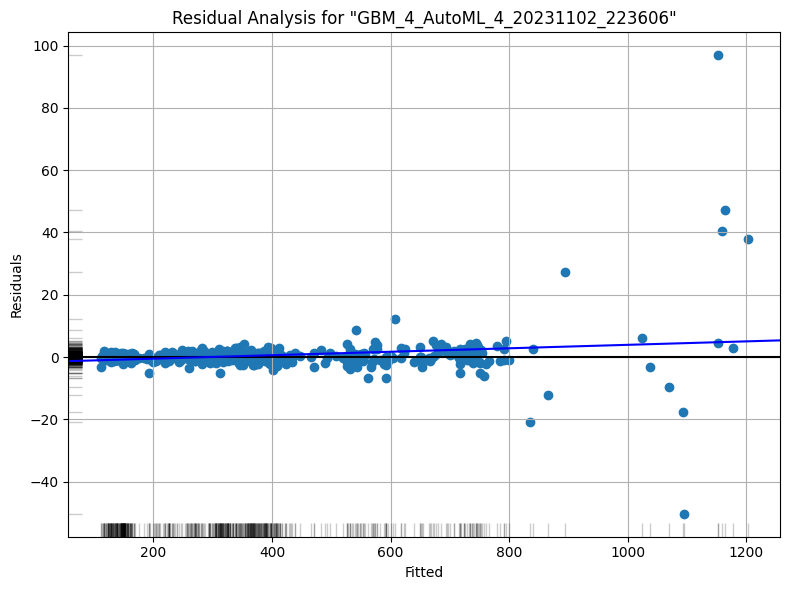

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

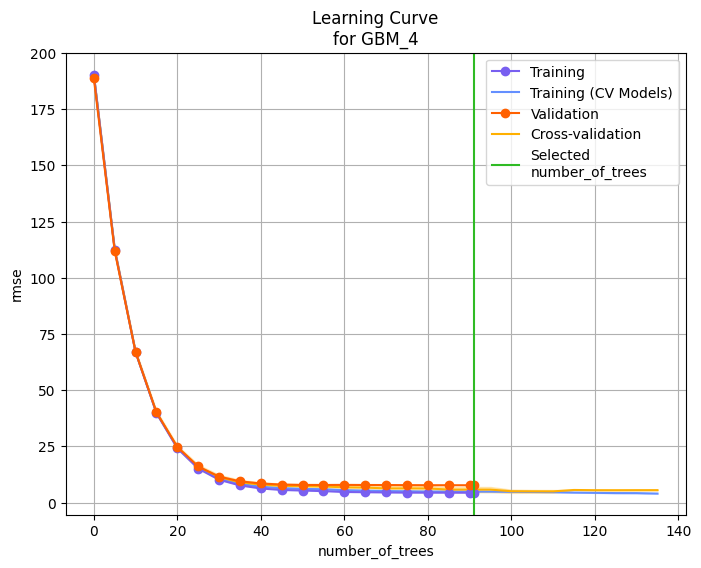

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

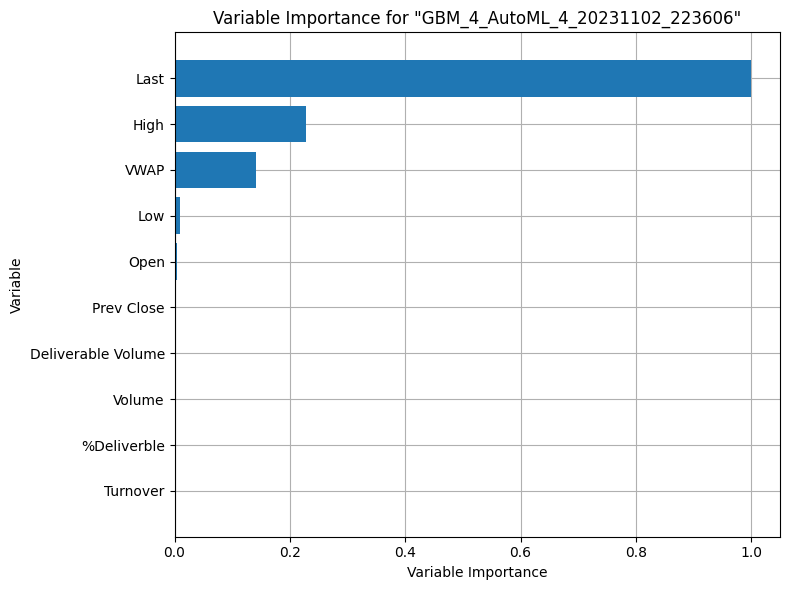

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

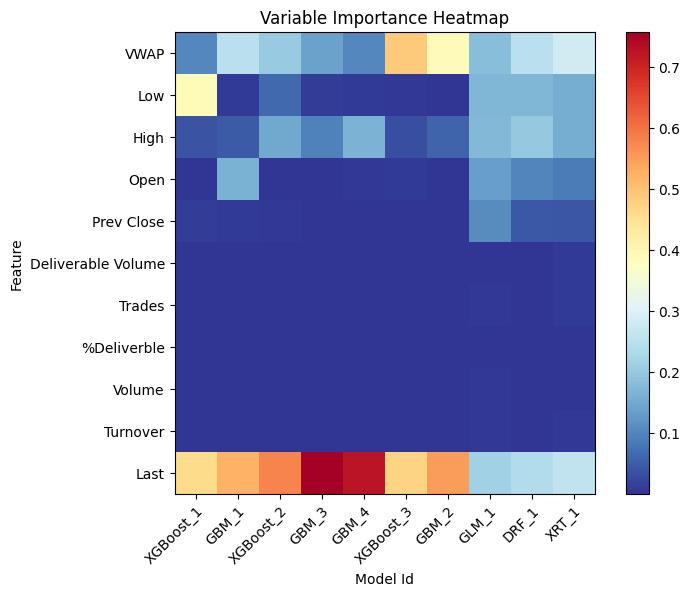

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

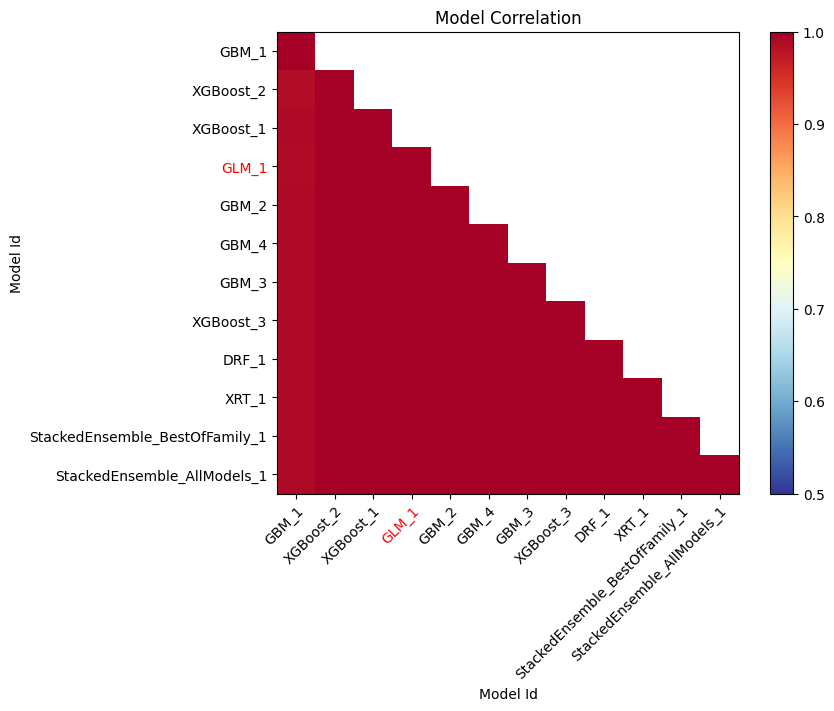

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

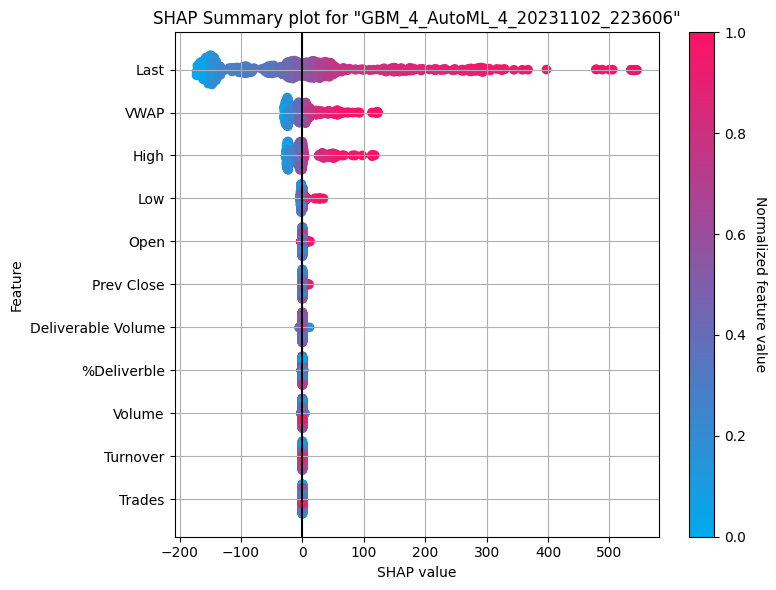

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

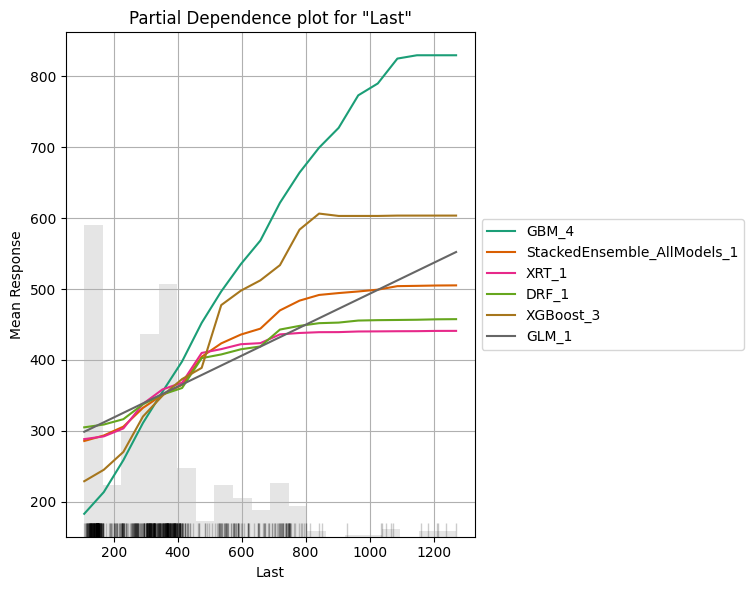

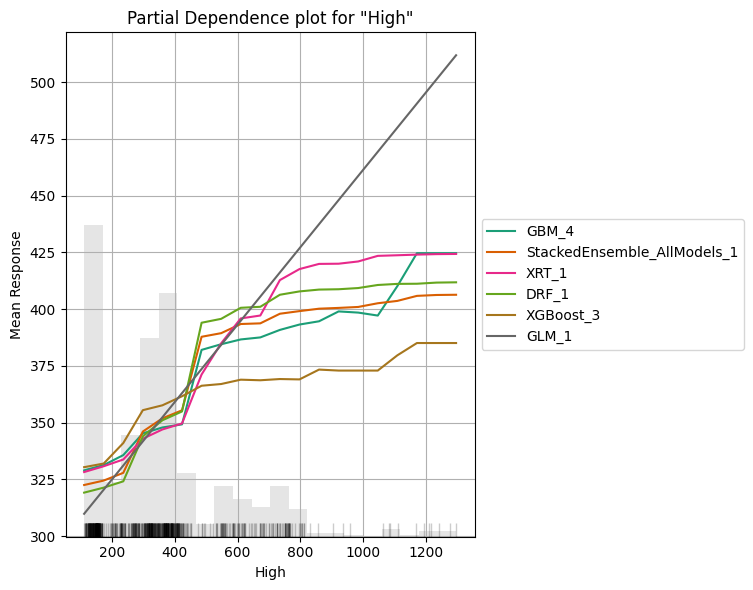

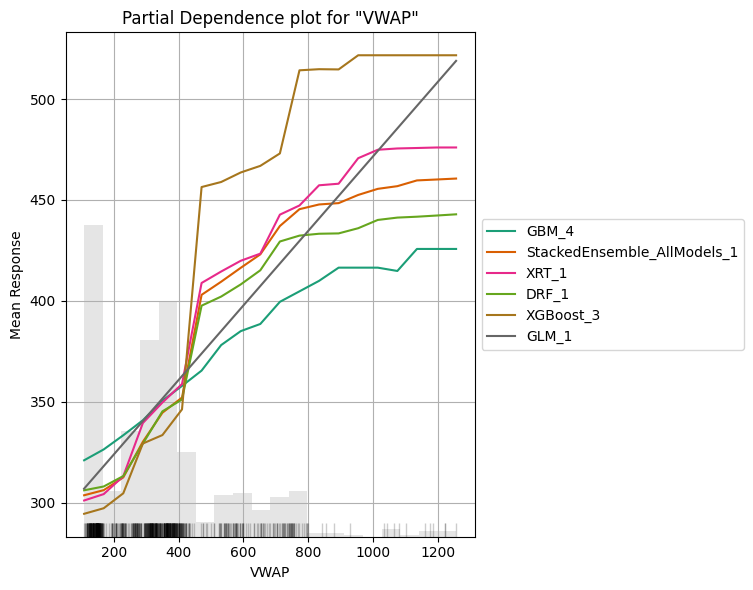

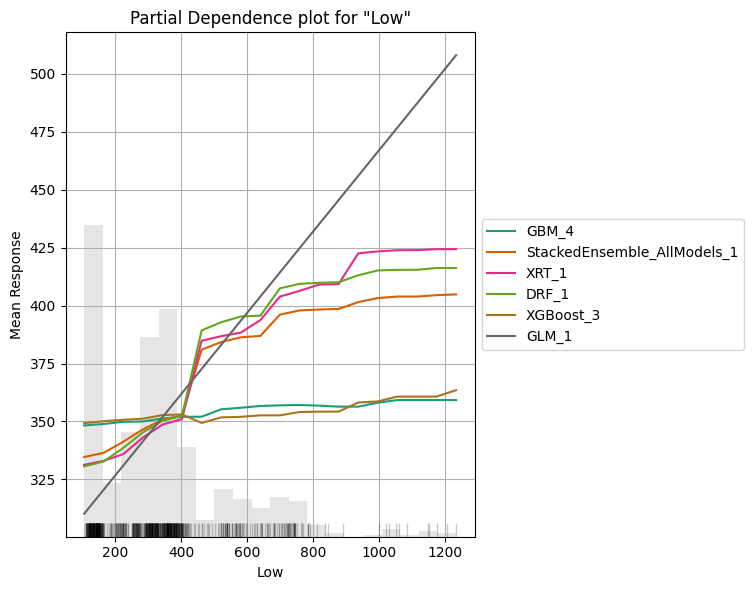

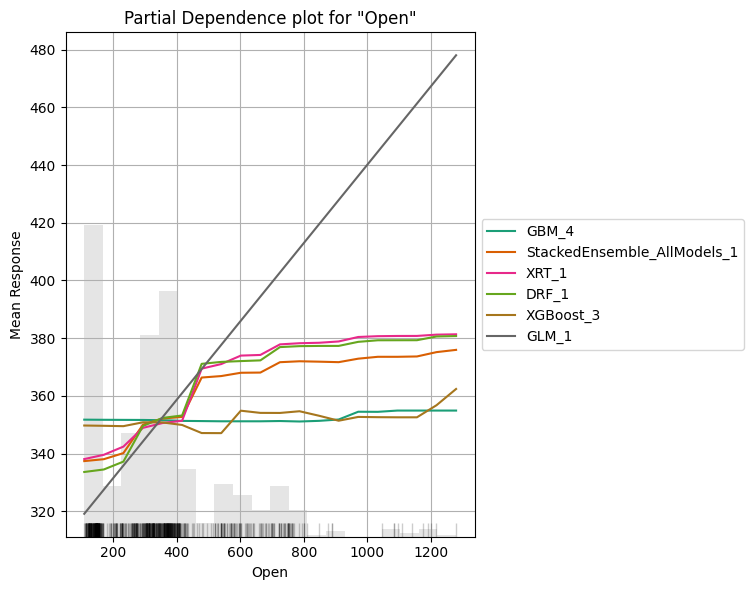

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

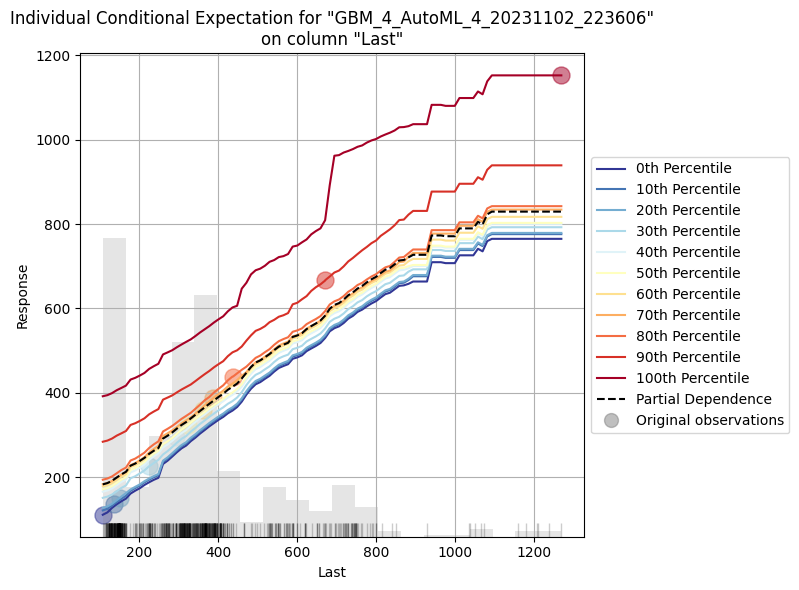

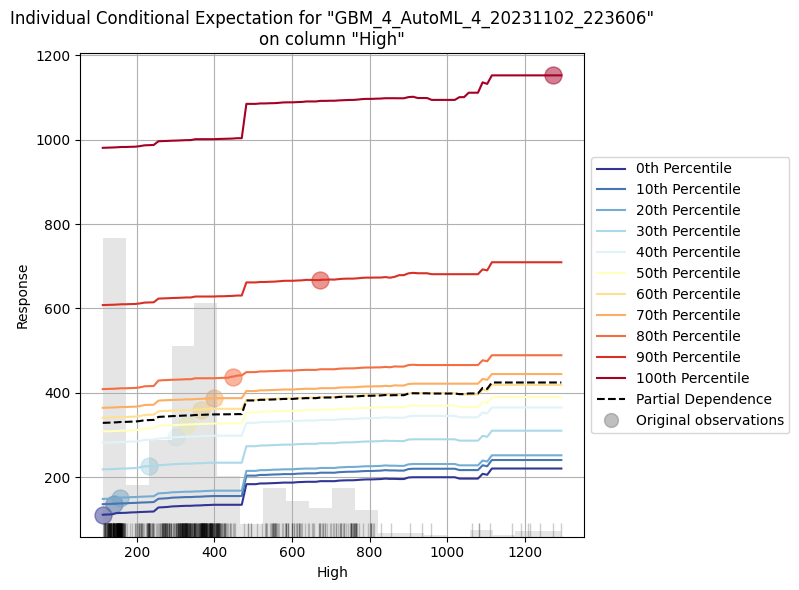

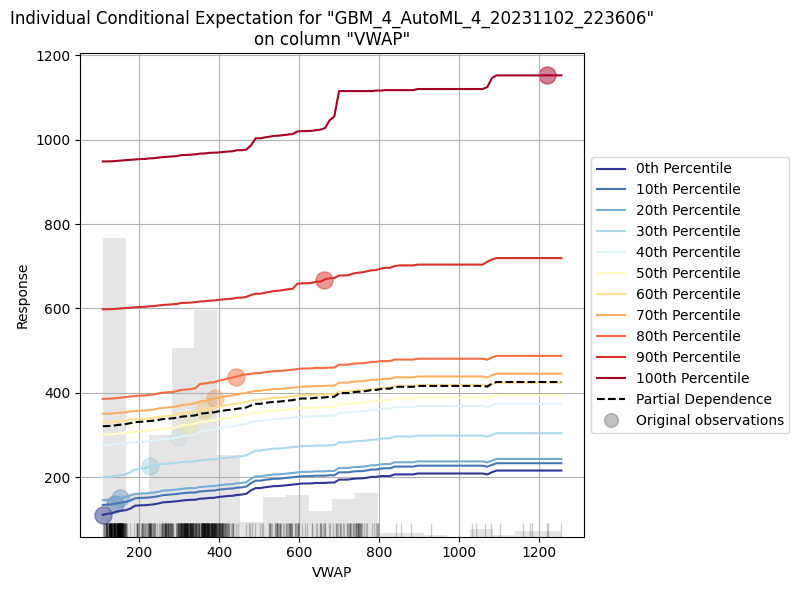

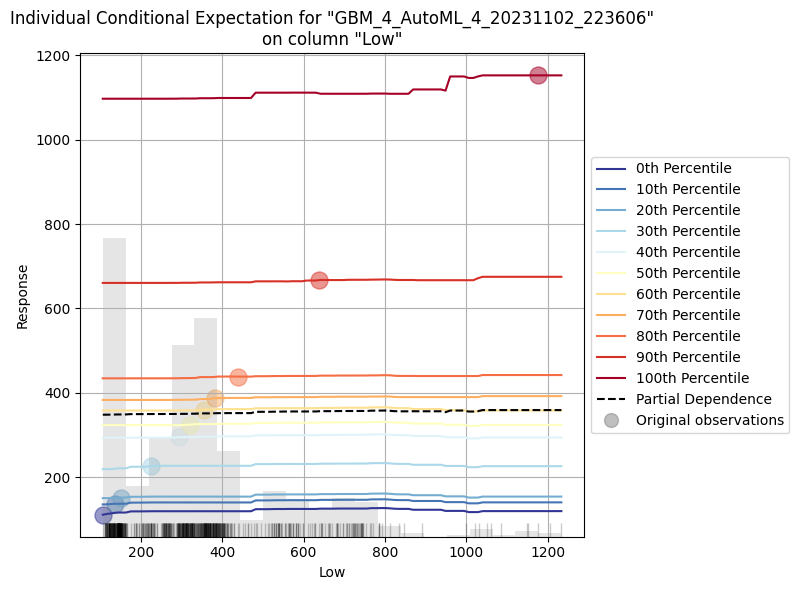

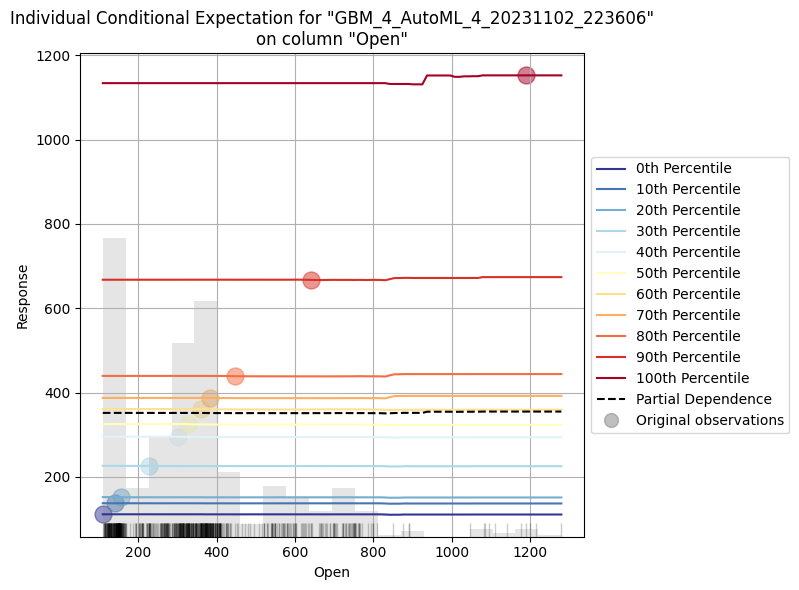

In [112]:
explain_model = aml.explain(frame = test, figsize = (8,6))

## **Residual Analysis**:
From the above plot we can obser that Most of the points are scattered randomly around 0 (the horizontal line at y = 0) indecating a well fit model.


## **Learning Curve Plot**:
There is a small gap between training and validation indicating a good fit (no over/under fitting)


## **Variable Importance**:
**Last**: have highest impact on the prediction outcome. This
suggests that the Last plays a significant role in determining the Close price

**High and VWAP**: have moderate impact on the prediction outcome.

**Low and Open**: have low impact on the prediction outcome.

## **Variable Importance Heatmap**:
From the Diagram we can observe that most of the models are highly impacted by **Last** to predict the closing price.(XGBoost, GBM)

Few models show impact for **VWAP, Low, High** in prediction.(XGBoost, GBM, GLM, DRF)

And Verv few show impact for **Open, Prev Close** in prediction.(GLM, DRF)

## **SHAP Summary**:
we can observe that **Last** has the most impact. **VWAP and Low** have moderate impact. **High and Prev Close have low impact.

## **Partial Dependence Plots**:
this plot also shows how **Last** has positive and high Impact.**VWAP and Low** have positive but Moderate impact. **High and Prev Close** have positive but low impact.

## **Individual Conditional Expectation**:
This plot suppoerts the obsercvations of the previous plots.

<ipython-input-106-7b4a6e70f27c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

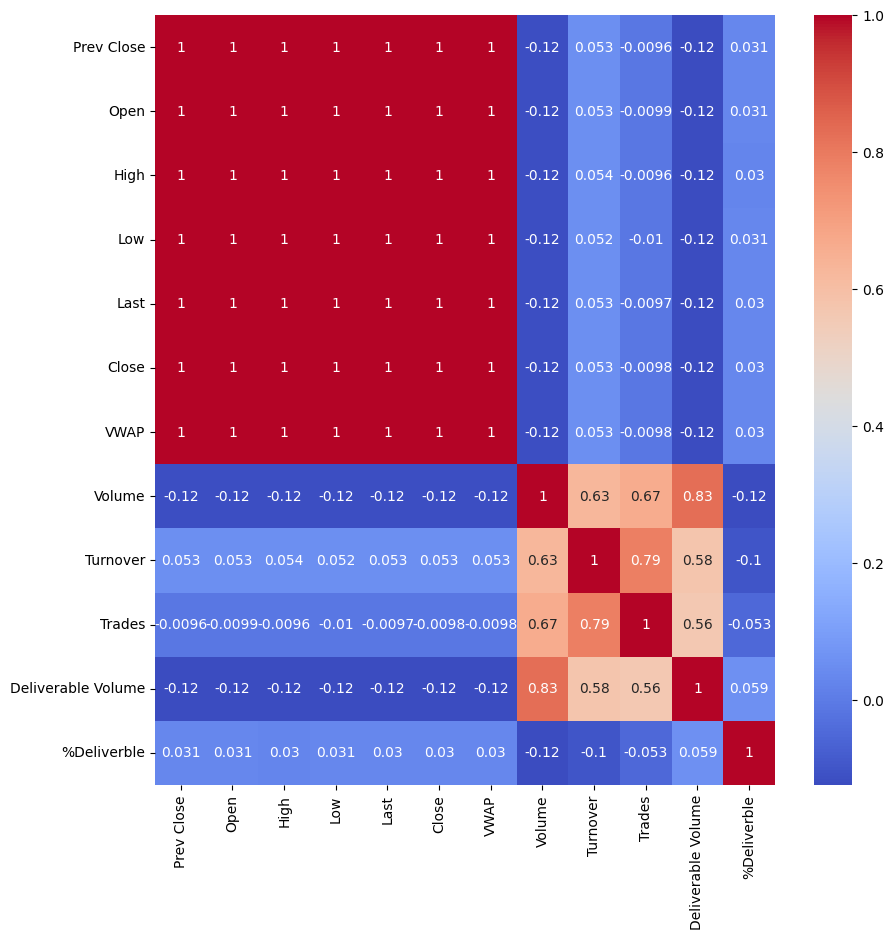

In [106]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

### Inference:
Based on the above matrix "Prev Close", "Open", "High", "Low", Last", "VWAP" are strongly correlated with the target variable. This indicates a significant relationship with the target.

In [117]:
# get VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Indicate which variables to compute VIF
Multic = data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']]

#Compute VIF
vif = pd.DataFrame()

vif["variables"] = Multic.columns

vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Prev Close,1797.754488
1,Open,9588.564654
2,High,19036.615693
3,Low,17565.226566
4,Last,12831.087806
5,VWAP,51987.824721
6,Volume,4.046238
7,Turnover,3.650568
8,Trades,3.067513
9,Deliverable Volume,3.463659


VIF for "Prev Close", "Open", "High", "Low", "VWAP" are greater than 10 that means they are multicollinearity.

# Re-executing AutoML with reduced columns


Removing - ['Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']

In [122]:
data_ap1=data_ap.drop(['Date', "Symbol", "Series", 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis=1)

In [123]:
# Convert dataframe to H2OFrame
hf1 = h2o.H2OFrame(data_ap1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [124]:
hf1.head()

Prev Close,Open,High,Low,Last,Close,VWAP
440,770,1050,770,959,962.9,984.72
962.9,984,990,874,885,893.9,941.38
893.9,909,914.75,841,887,884.2,888.09
884.2,890,958,890,929,921.55,929.17
921.55,939.75,995,922,980,969.3,965.65
969.3,985,1056,976,1049,1041.45,1015.39
1041.45,1061,1099.5,1050,1084,1082.45,1082.79
1082.45,1089,1109.7,1051,1090.1,1081.3,1087.03
1081.3,1100,1134,1078,1100,1102.4,1106.57
1102.4,1110,1110,1061.1,1073.55,1075.4,1080.38


In [126]:
# train/test split
train1, valid1, test1 = hf1.split_frame(
    ratios=[0.7, 0.1], # train:validate:test = 0.7:0.1:0.2
    destination_frames=["train", "valid", "test"],
    seed=1234
)

# Summary of the split
print("Training set:", train1.shape)
print("Validation set:", valid1.shape)
print("Test set:", test1.shape)

Training set: (2339, 7)
Validation set: (336, 7)
Test set: (647, 7)


In [128]:
# Sperate the dependent and independent variables
y1 ='Close'
X1 = [ i for i in hf1.columns if i not in ['Close']]

print("Dependent Variable: ", y1)
print("Independent Variable: ", X1)

Dependent Variable:  Close
Independent Variable:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']


In [129]:
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml1 = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", max_runtime_secs=600)
aml1.train(x=X1, y=y1, training_frame=train1, validation_frame=valid1, leaderboard_frame=test1)

AutoML progress: |
02:29:22.877: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_5_20231103_22922


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 75                          107970                 10           10           10            27            147           109.827

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 29.736522275379773
RMSE: 5.453120416365273
MAE: 0.9210099590900057
RMSLE: 0.005069531033847104
Mean Residual Deviance: 29.736522275379773

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 69.44152311071036
RMSE: 8.333158051465864
MAE: 1.9082613532749642
RMSLE: 0.008920465961848032
Mean Residual Deviance: 69.44152311071036

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 50.171475834355356
RMSE: 7.0831826063116115
MAE: 1.7147263763028489
RMSLE: 0.007750664445620614
Mean Residual Deviance: 50.171475834355356

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.71043     0.19452      1.94311       1.55896       1.90083       1.59851       1.55077
mean_residual_deviance  50.9375     12.0831      60.1137       32.3052       48.2148       51.0658       62.9879
mse                     50.9375     12.0831      60.1137       32.3052       48.2148       51.0658       62.9879
r2                      0.998593    0.000333642  0.998328      0.999108      0.998658      0.9986        0.998269
residual_deviance       50.9375     12.0831      60.1137       32.3052       48.2148       51.0658       62.9879
rmse                    7.09266     0.888611     7.7533        5.68377       6.94369       7.14603       7.93649
rmsle                   0.00773071  0.000778912  0.00841922    0.00660646    0.00850468    0.00743391    0.0076893

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-11-03 02:29:57  3.481 sec   0                  190.248          141.44          36194.3              188.731            145.272           35619.2
    2023-11-03 02:29:57  3.532 sec   5                  112.55           83.5124         12667.6              112.09             85.8497           12564.2
    2023-11-03 02:29:57  3.588 sec   10                 66.8571          49.3611         4469.87              66.899             50.7601           4475.48
    2023-11-03 02:29:57  3.642 sec   15                 39.7762          29.1618         1582.15              40.0424            29.9549           1603.39
    2023-11-03 02:29:57  3.695 sec   20                 24.1367          17.2577         582.58               24.7796            17.7539           614.029
    2023-11-03 02:29:57  3.749 sec   25                 15.1189          10.2413         228.582              16.226             10.7376           263.282
    2023-11-03 02:29:57  3.803 sec   30                 10.2003          6.21175         104.046              11.8361            6.7355            140.092
    2023-11-03 02:29:57  3.860 sec   35                 7.79461          3.87794         60.7559              9.90411            4.4746            98.0914
    2023-11-03 02:29:57  3.912 sec   40                 6.5903           2.53397         43.432               8.9

In [130]:
# View all models
leaderboard1 = aml1.leaderboard
leaderboard1.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_4_AutoML_5_20231103_22922,1.61391,5.49031,30.1435,0.0066066,30.1435
StackedEnsemble_AllModels_1_AutoML_5_20231103_22922,1.76167,4.37855,19.1717,0.00673405,19.1717
StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_22922,1.7666,4.37069,19.1029,0.0067176,19.1029
DRF_1_AutoML_5_20231103_22922,1.79853,4.46373,19.9249,0.0068182,19.9249
XRT_1_AutoML_5_20231103_22922,1.81352,4.5684,20.8703,0.00744802,20.8703
GBM_3_AutoML_5_20231103_22922,1.82166,6.07716,36.9319,0.00737673,36.9319
GBM_2_AutoML_5_20231103_22922,1.88115,5.31564,28.256,0.00708489,28.256
XGBoost_3_AutoML_5_20231103_22922,2.21744,5.4681,29.9001,0.00880749,29.9001
XGBoost_2_AutoML_5_20231103_22922,2.48031,5.81671,33.8341,0.00959333,33.8341
XGBoost_1_AutoML_5_20231103_22922,2.77359,8.68209,75.3787,0.0110688,75.3787


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_22922,4.37069,19.1029,1.7666,0.0067176,19.1029,1172,0.169993,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_5_20231103_22922,4.37855,19.1717,1.76167,0.00673405,19.1717,1091,0.11774,StackedEnsemble
DRF_1_AutoML_5_20231103_22922,4.46373,19.9249,1.79853,0.0068182,19.9249,1061,0.032018,DRF
XRT_1_AutoML_5_20231103_22922,4.5684,20.8703,1.81352,0.00744802,20.8703,3222,0.029676,DRF
GBM_2_AutoML_5_20231103_22922,5.31564,28.256,1.88115,0.00708489,28.256,353,0.029337,GBM
XGBoost_3_AutoML_5_20231103_22922,5.4681,29.9001,2.21744,0.00880749,29.9001,804,0.006514,XGBoost
GBM_4_AutoML_5_20231103_22922,5.49031,30.1435,1.61391,0.0066066,30.1435,757,0.036659,GBM
XGBoost_2_AutoML_5_20231103_22922,5.81671,33.8341,2.48031,0.00959333,33.8341,1043,0.009426,XGBoost
GLM_1_AutoML_5_20231103_22922,5.96554,35.5876,3.21742,0.0129267,35.5876,23,0.002078,GLM
GBM_3_AutoML_5_20231103_22922,6.07716,36.9319,1.82166,0.00737673,36.9319,529,0.079676,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

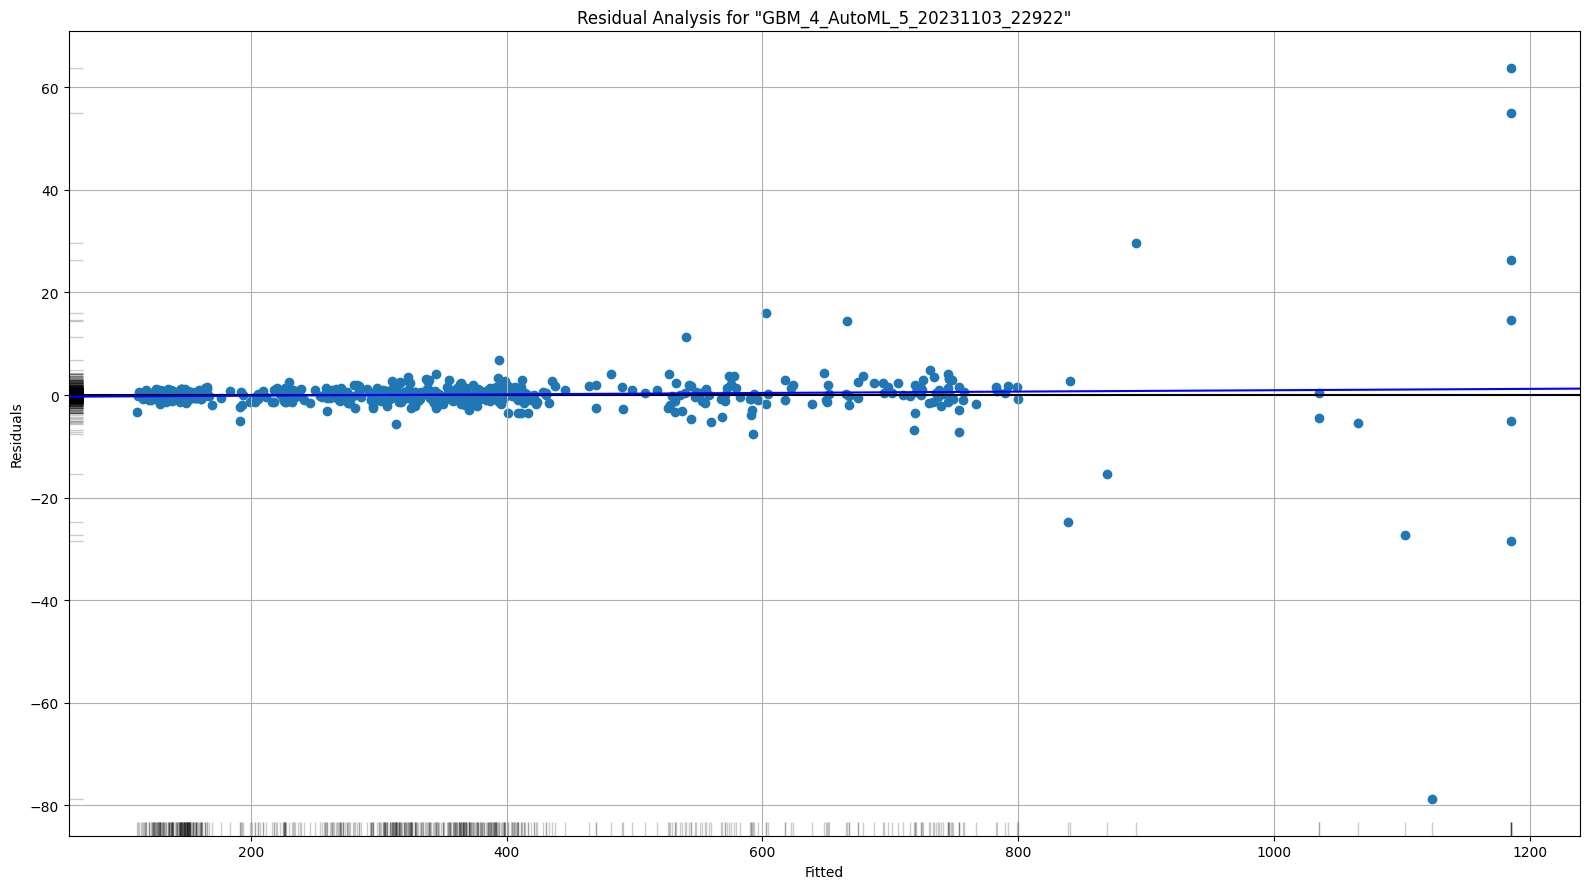

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

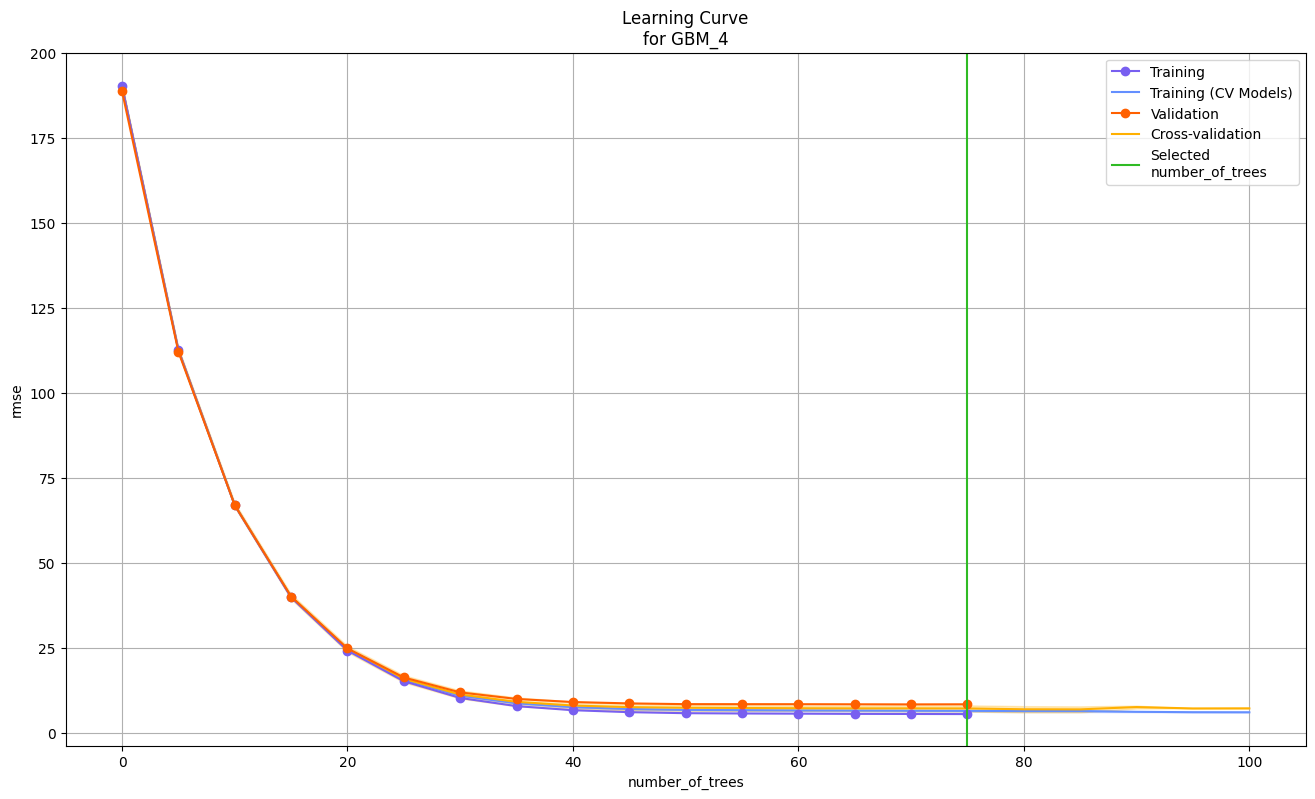

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

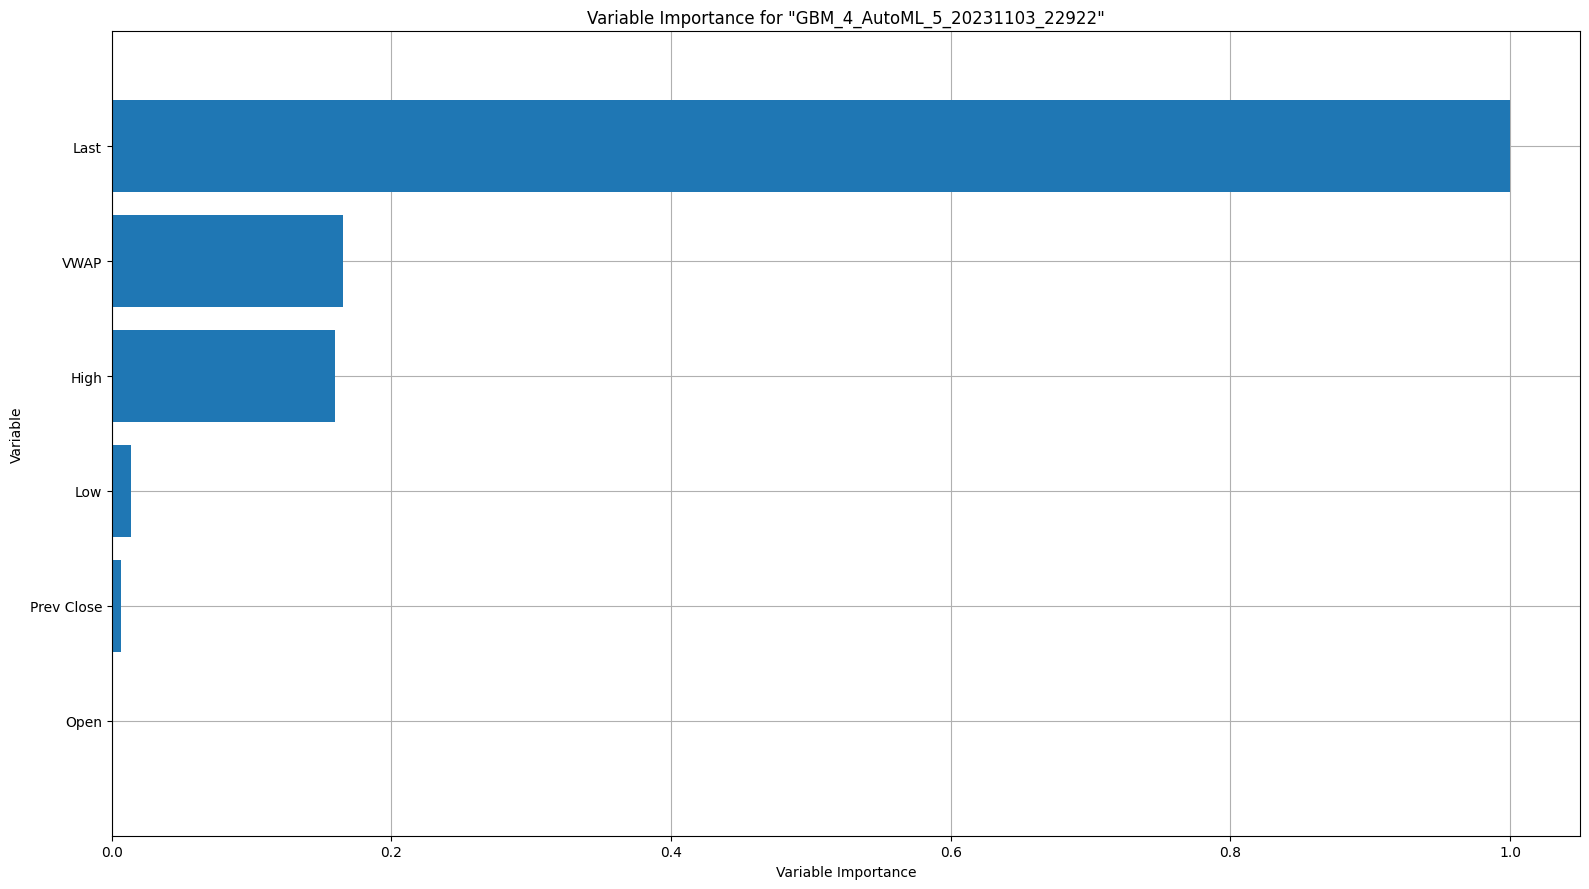

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

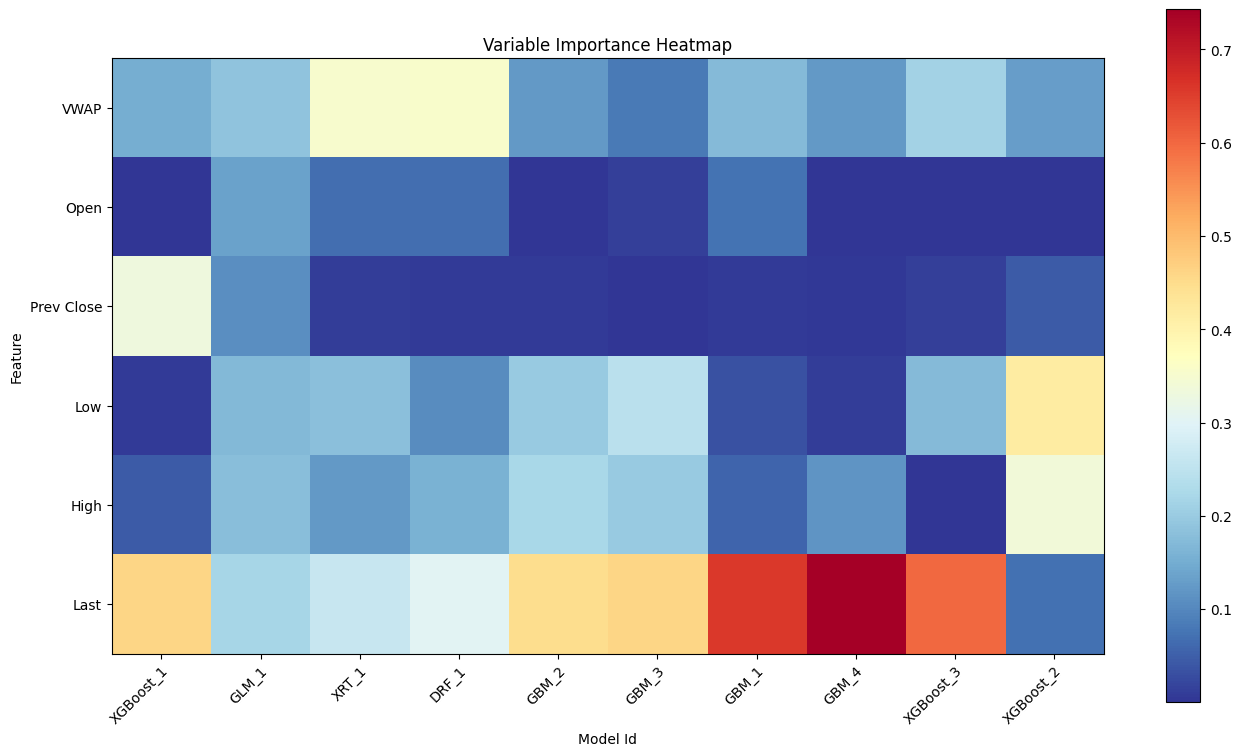

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

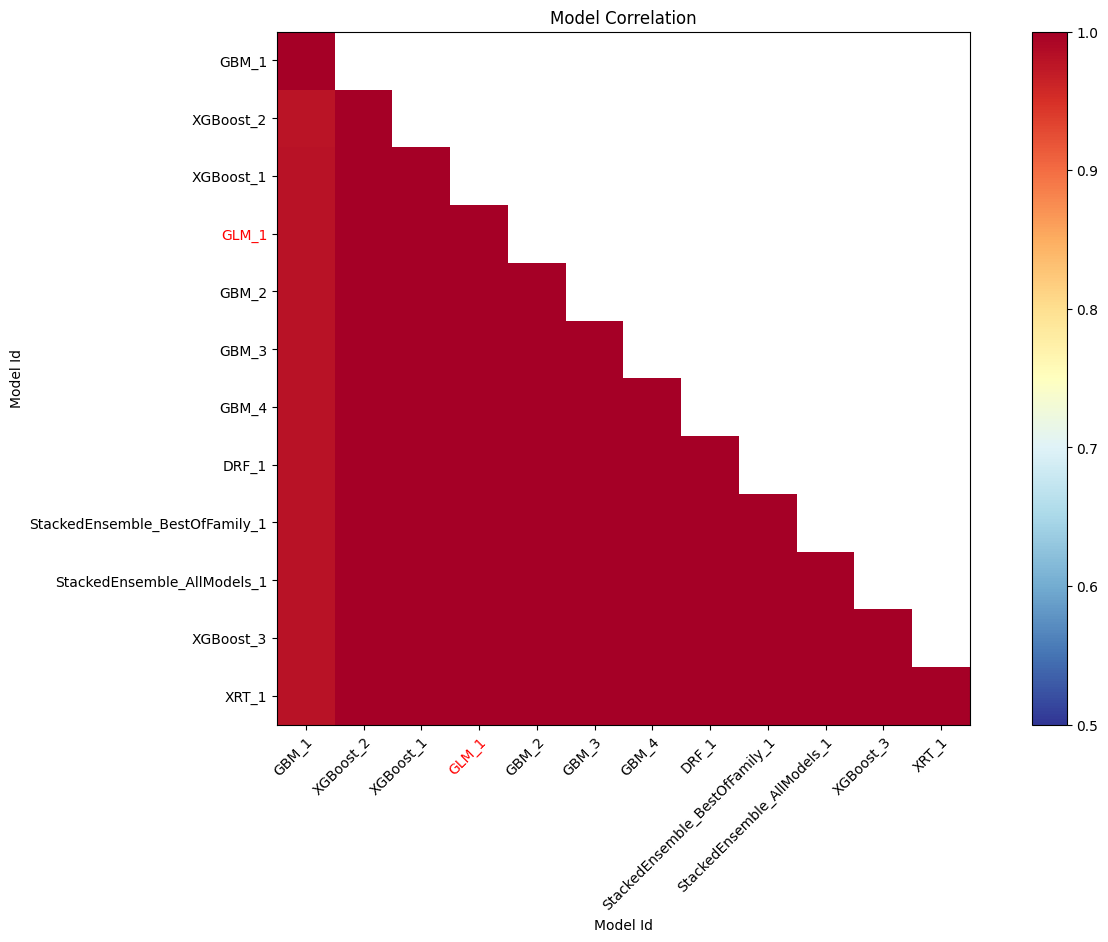

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

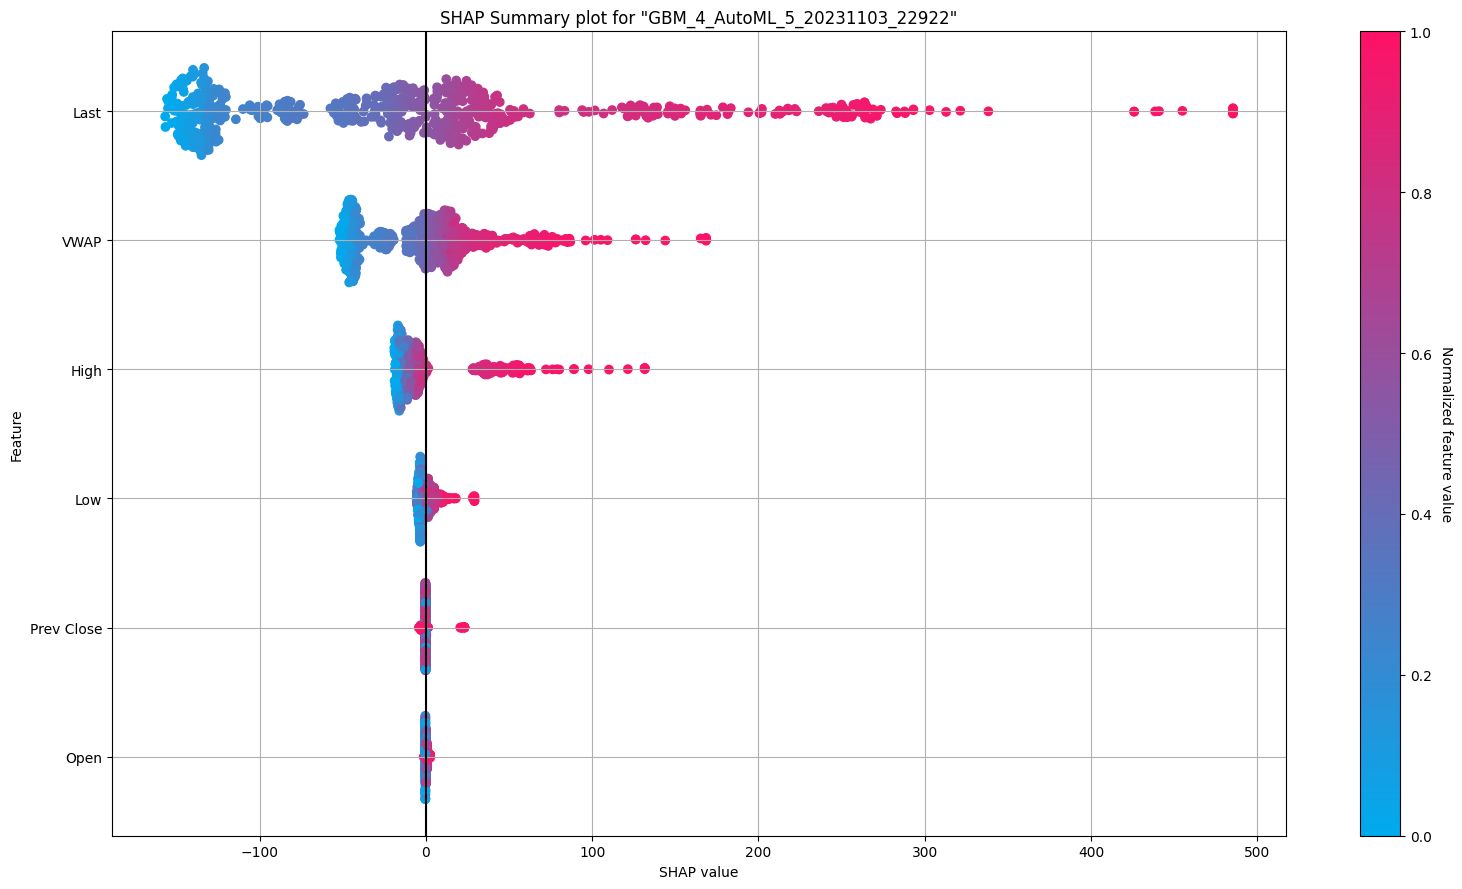

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

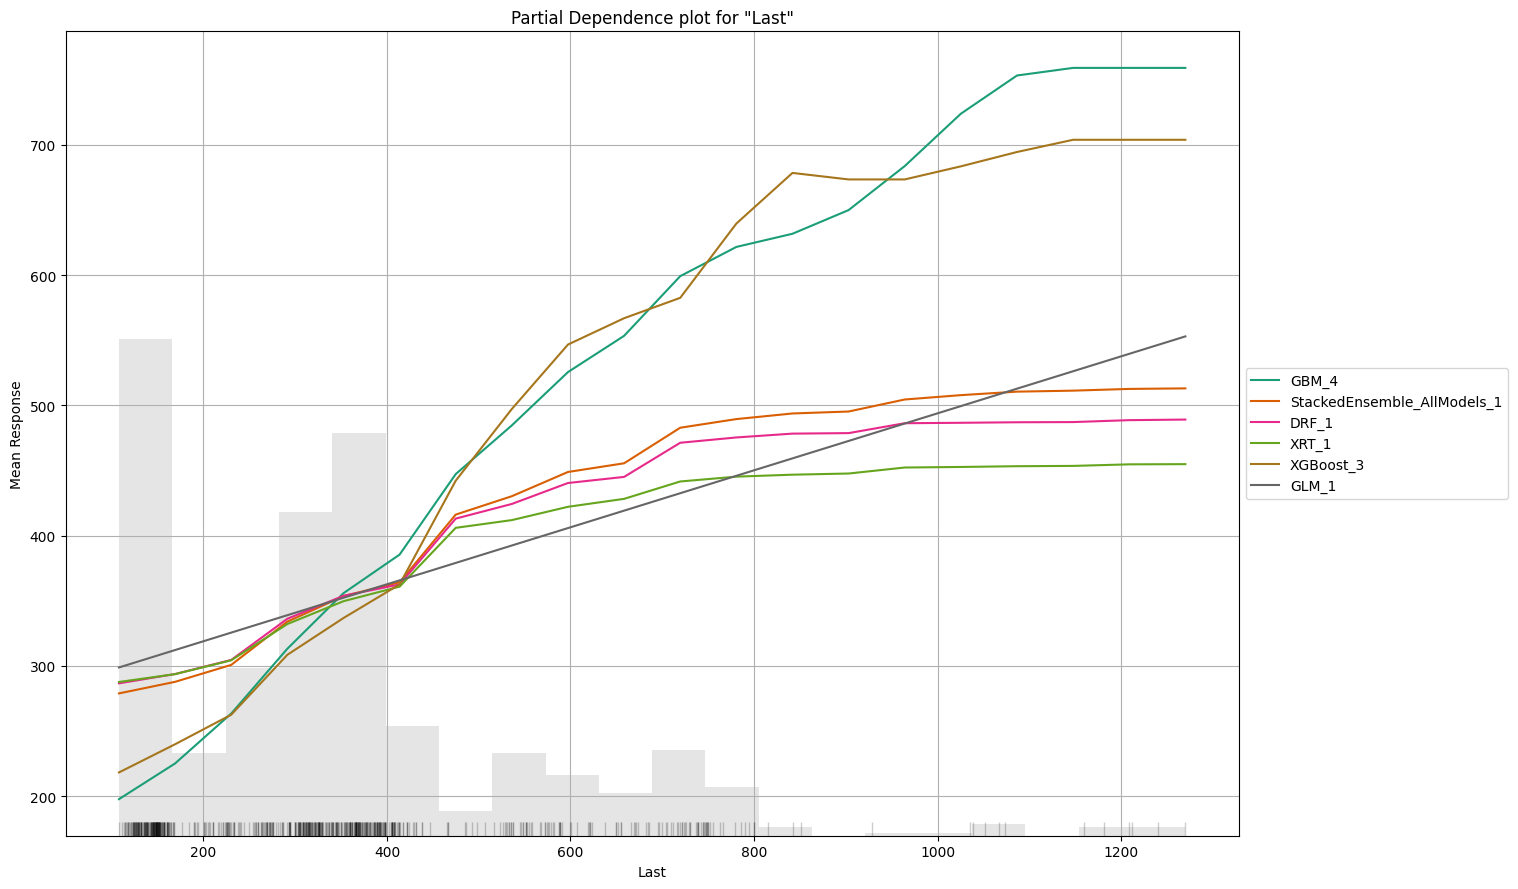

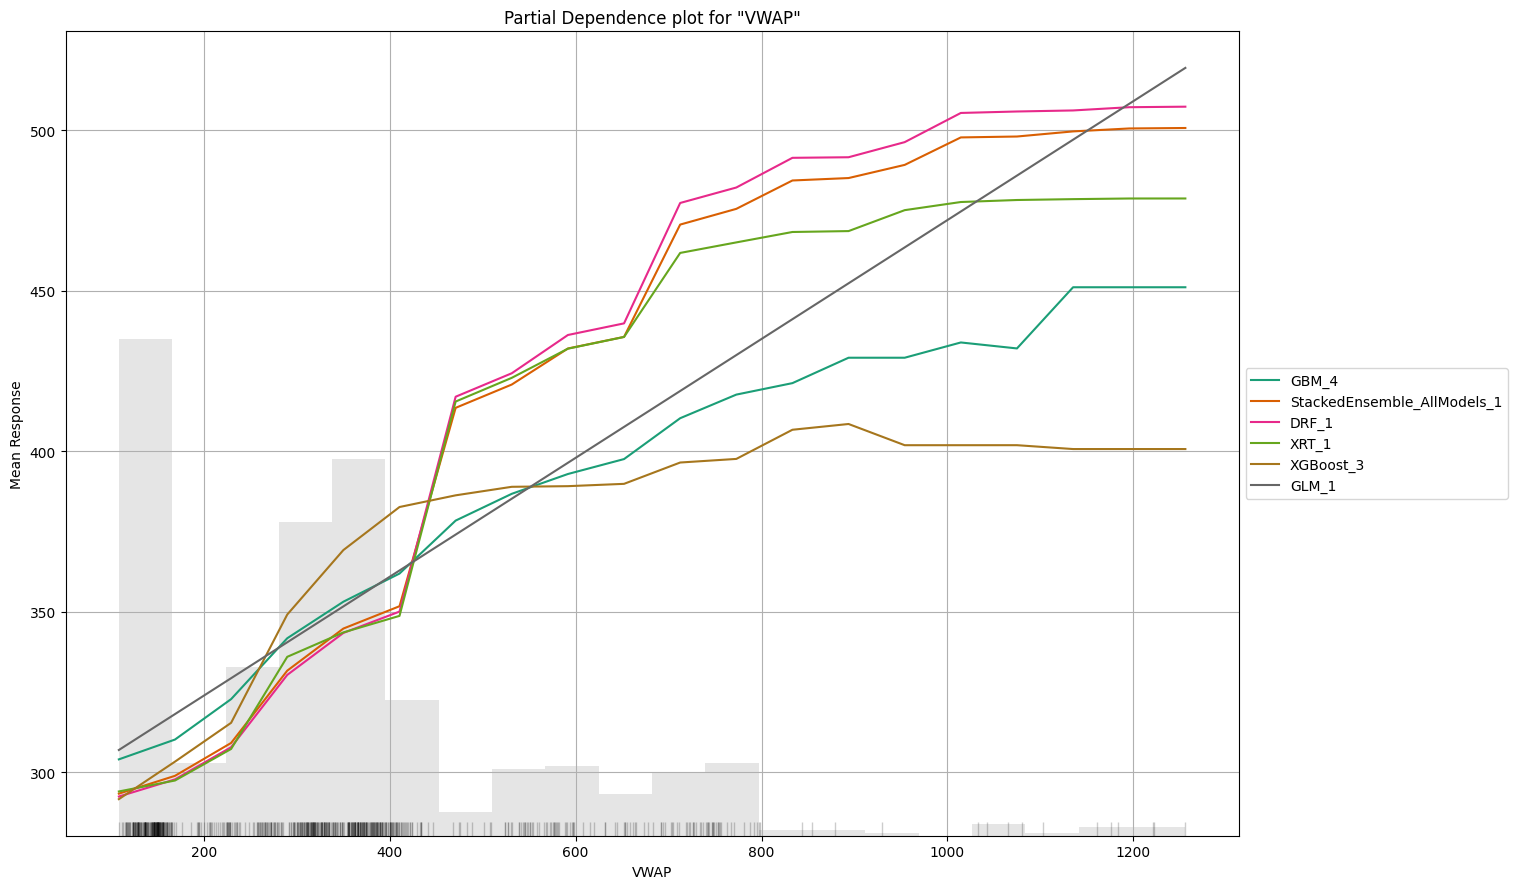

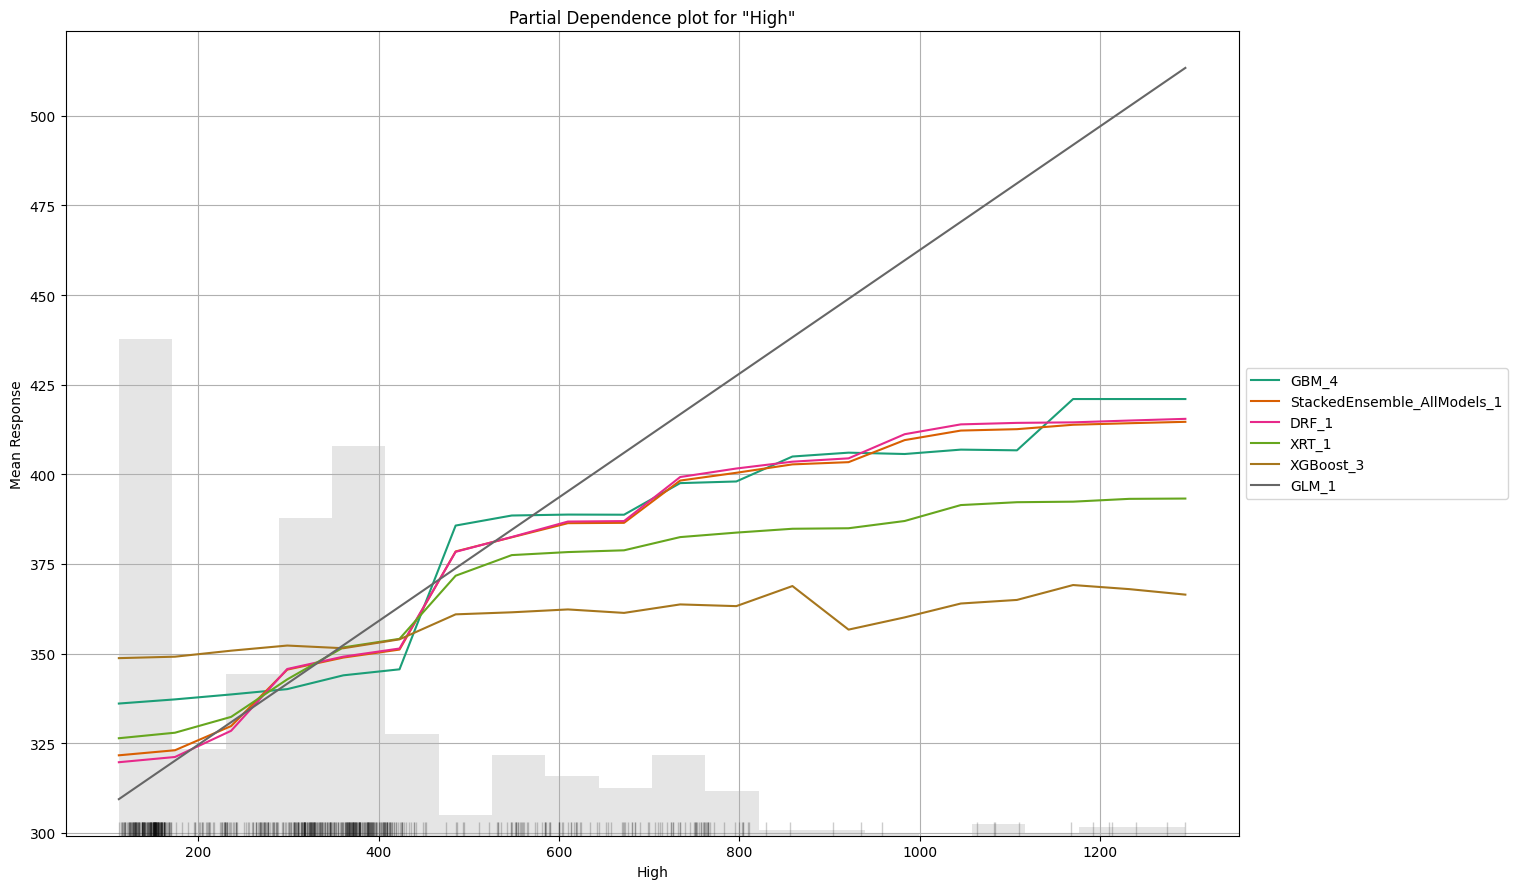

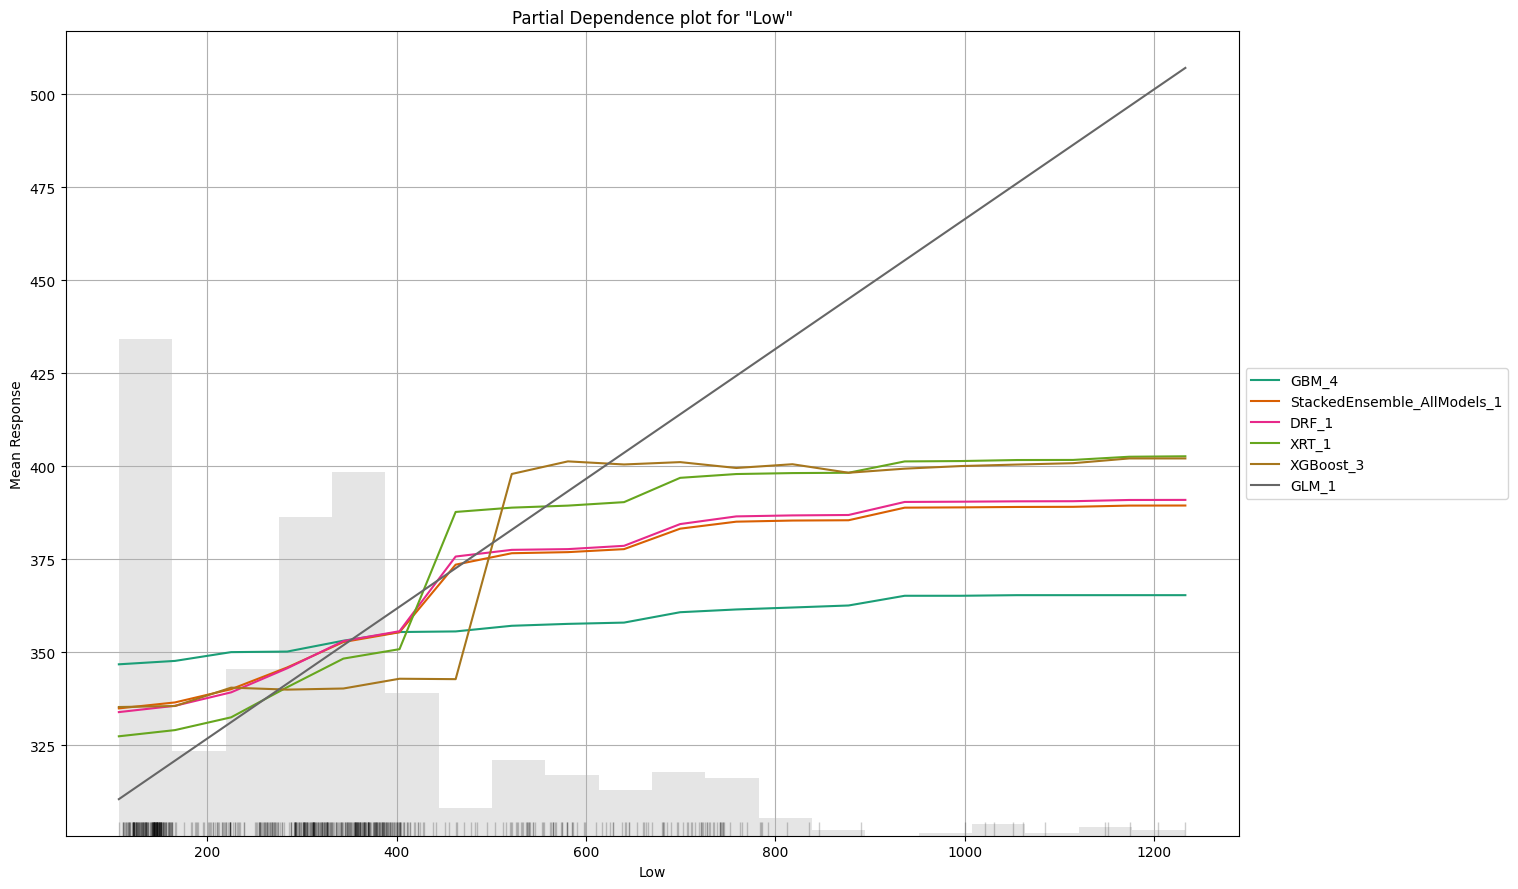

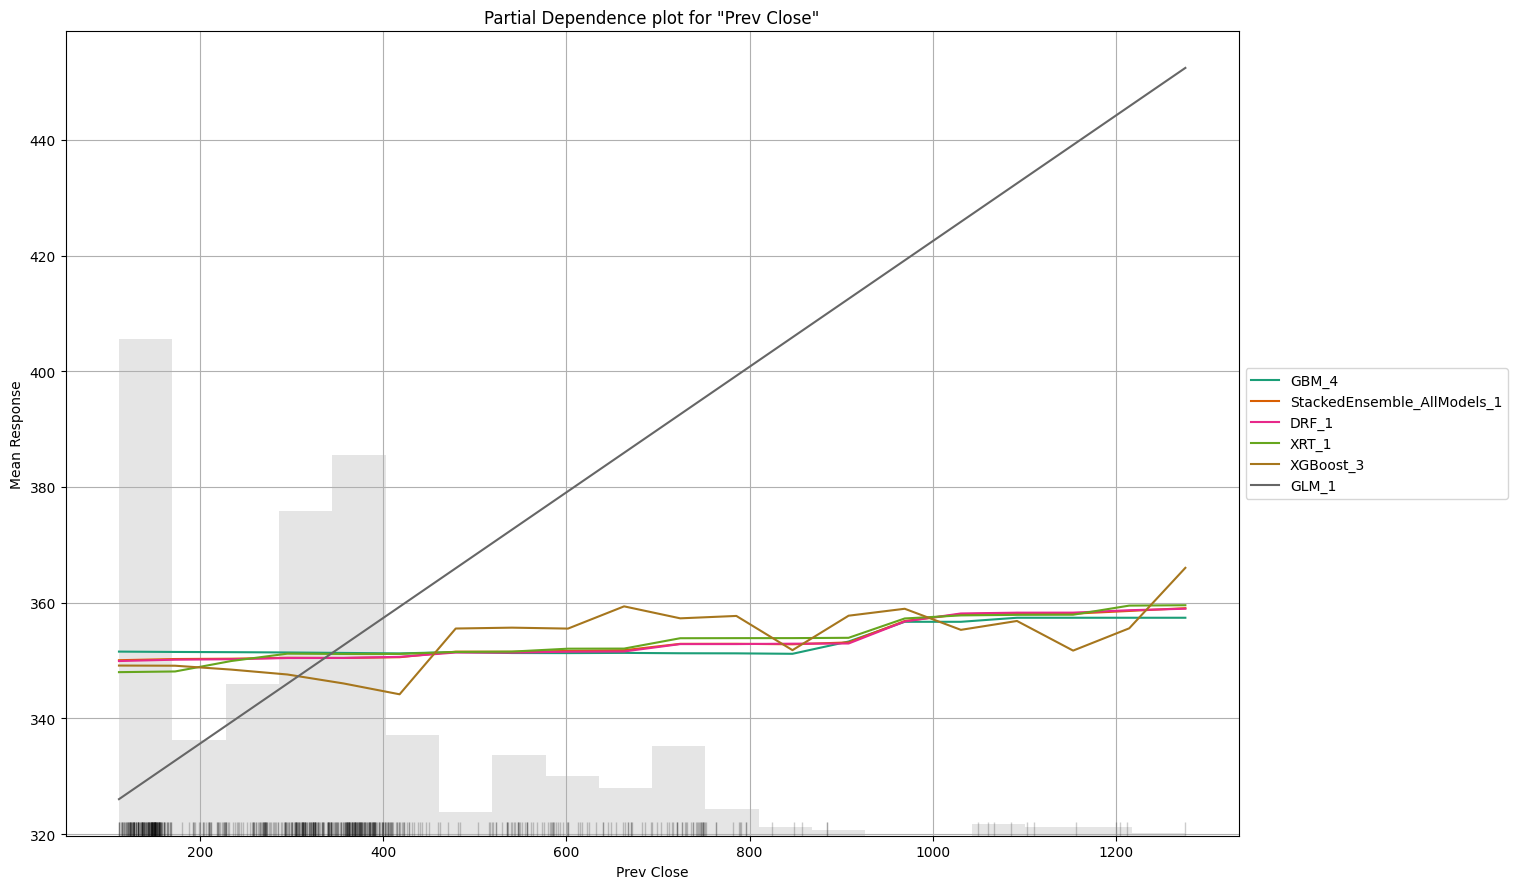

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

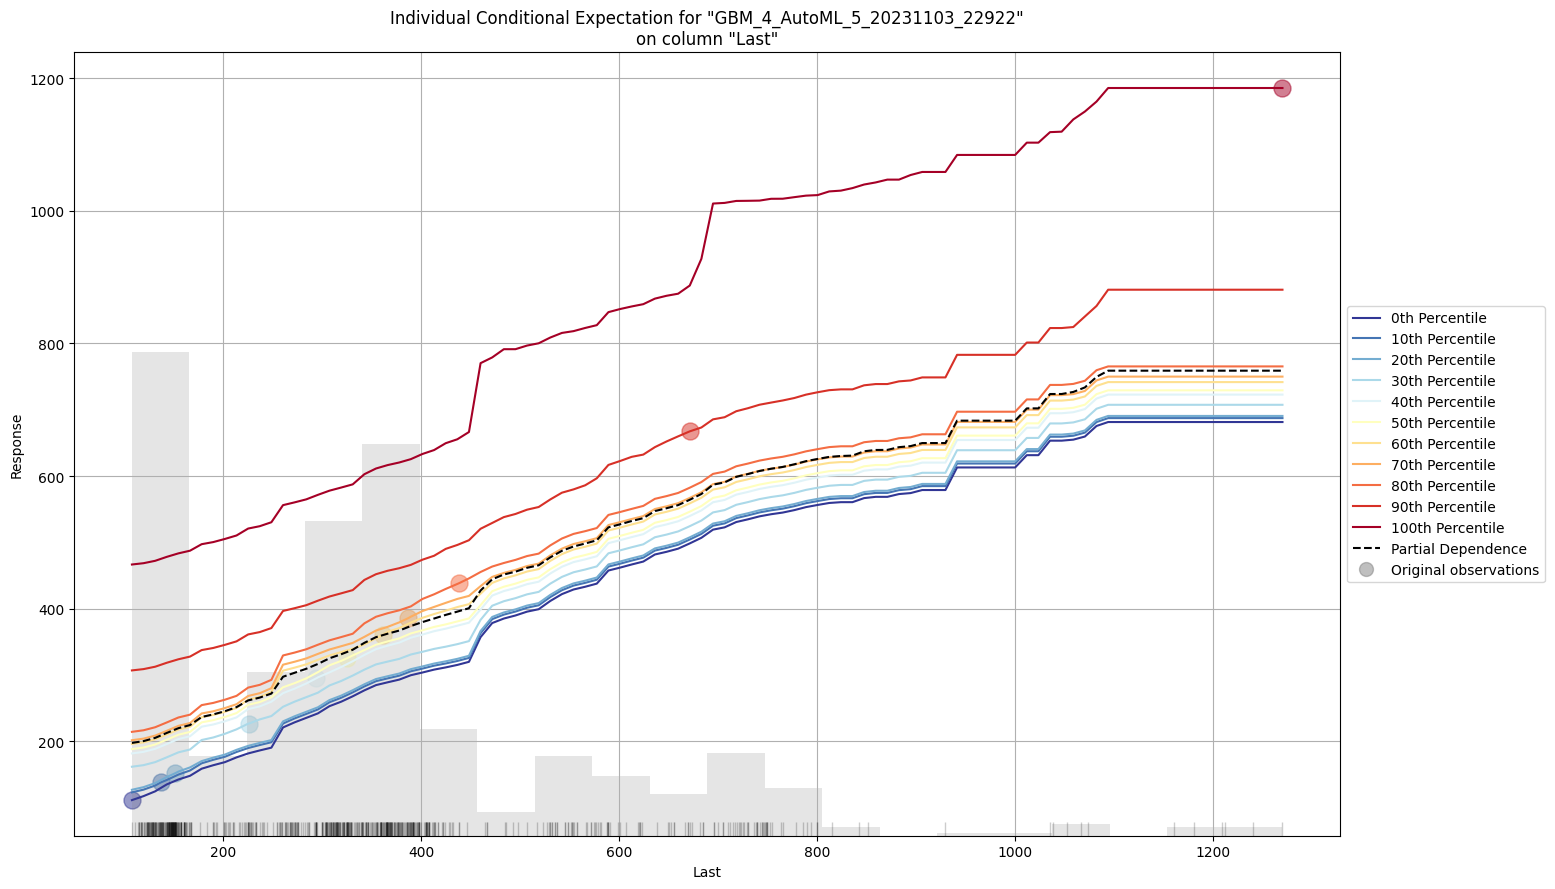

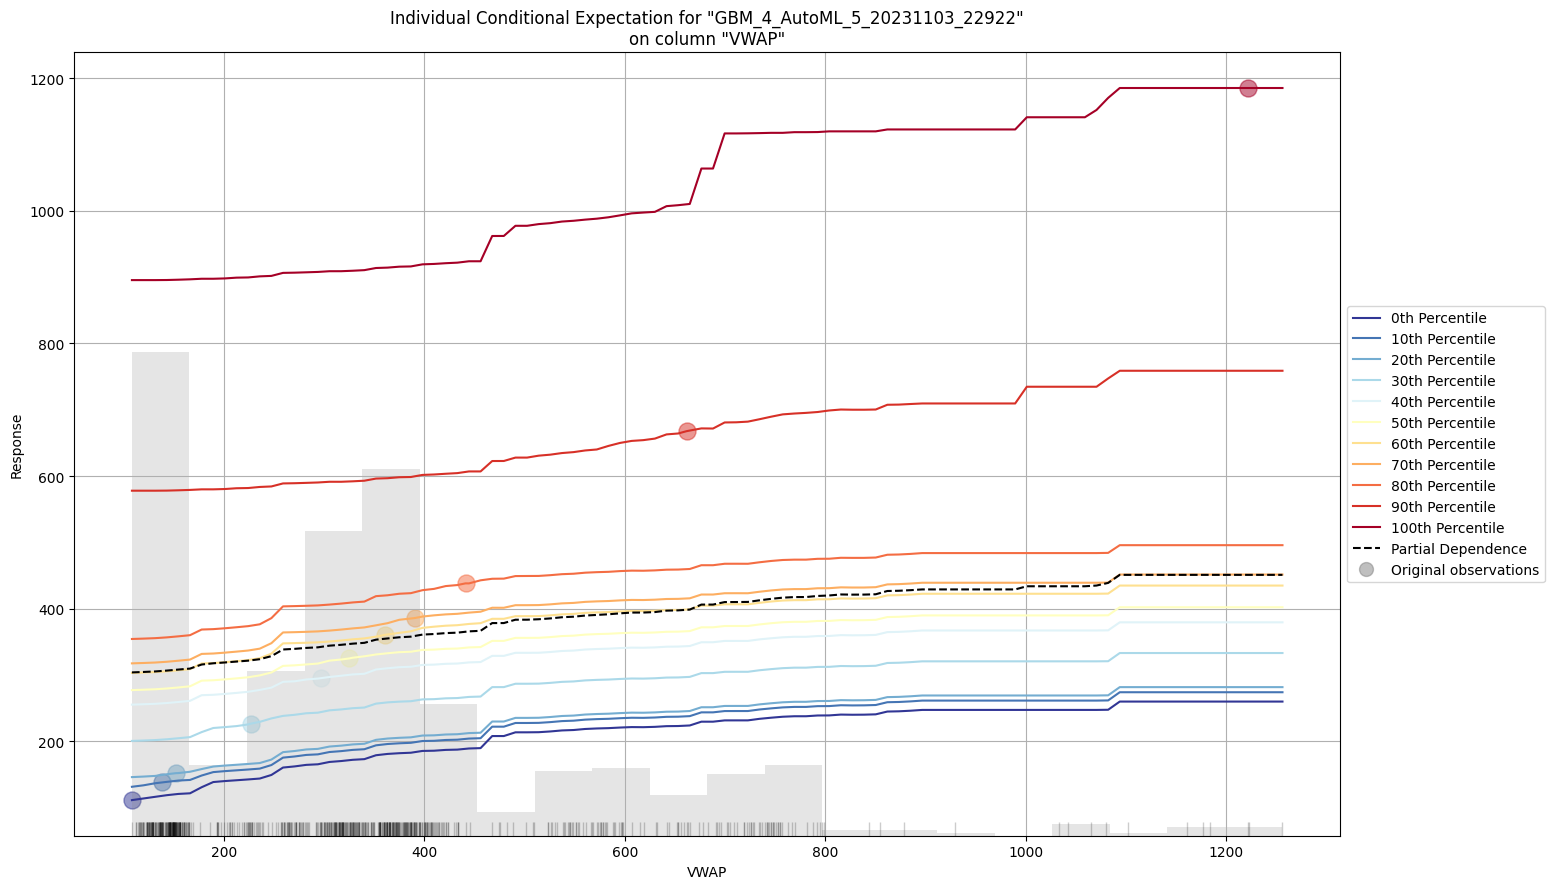

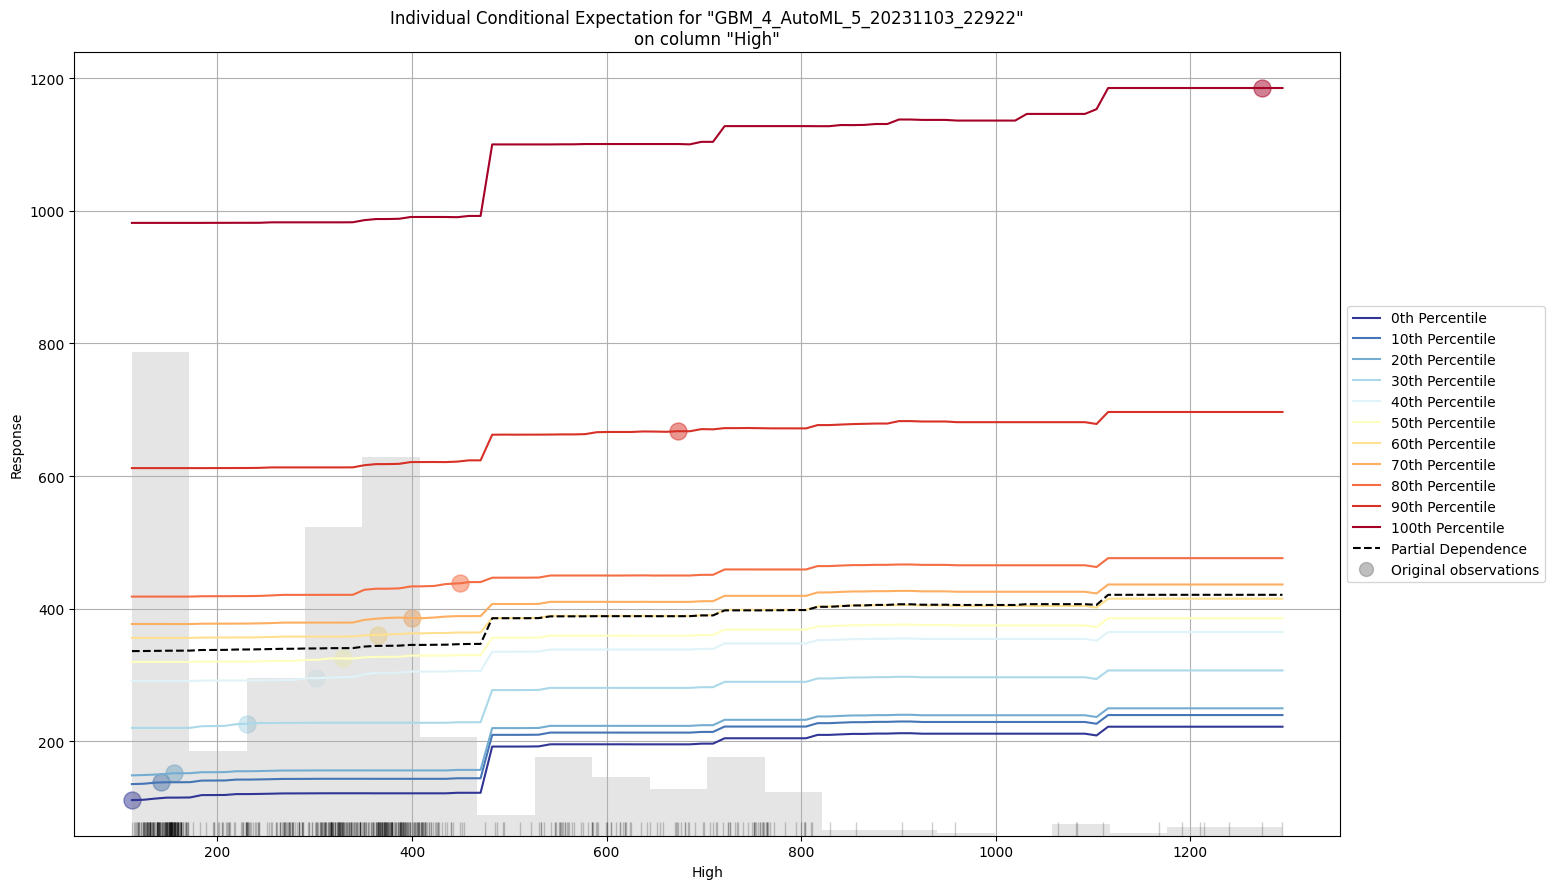

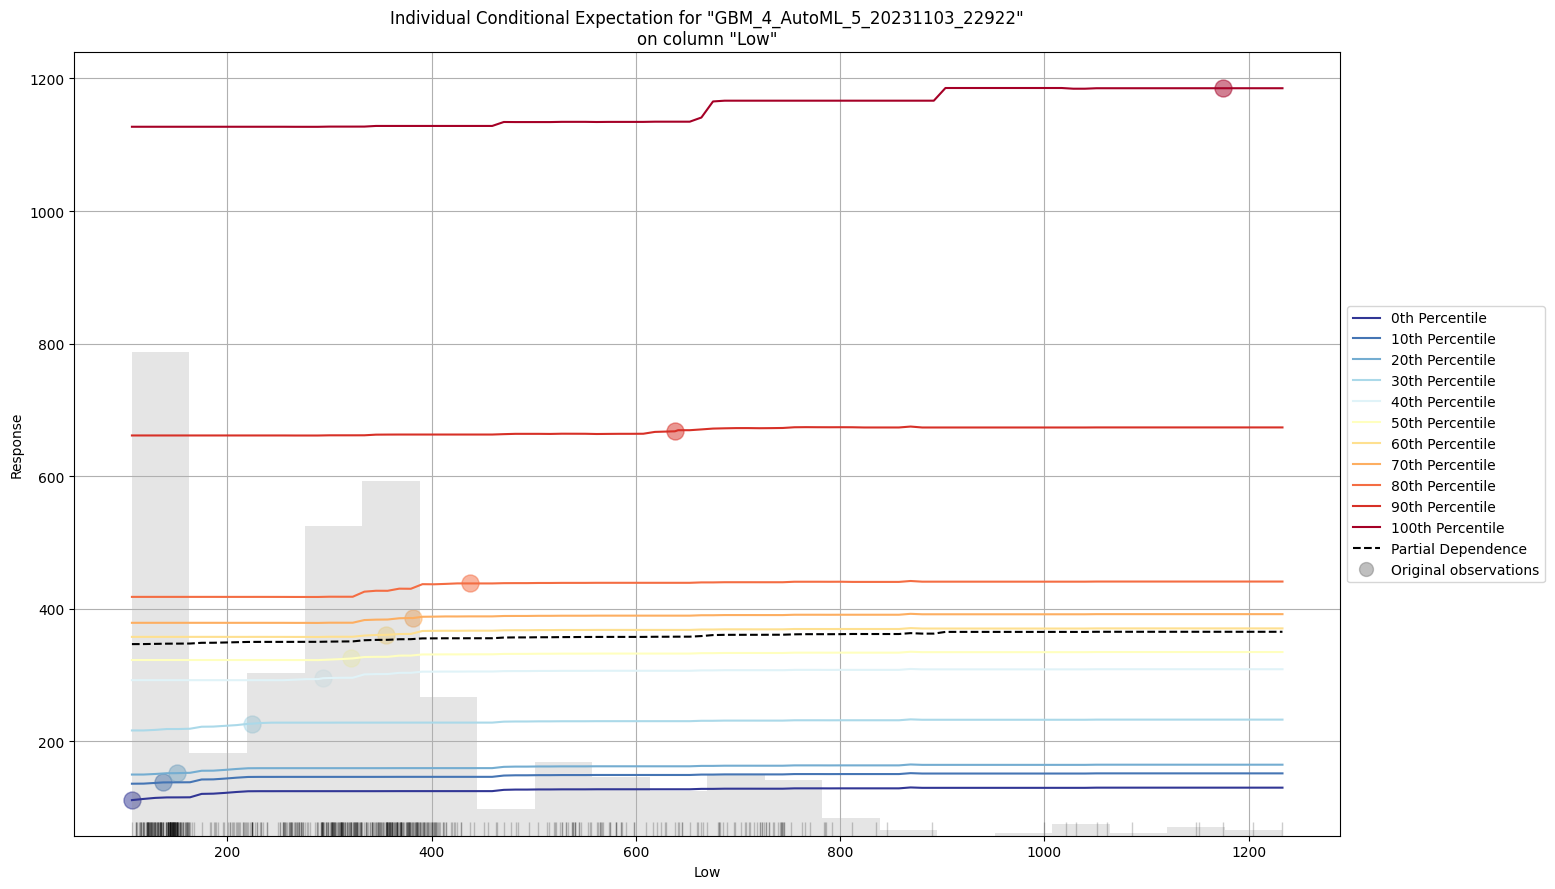

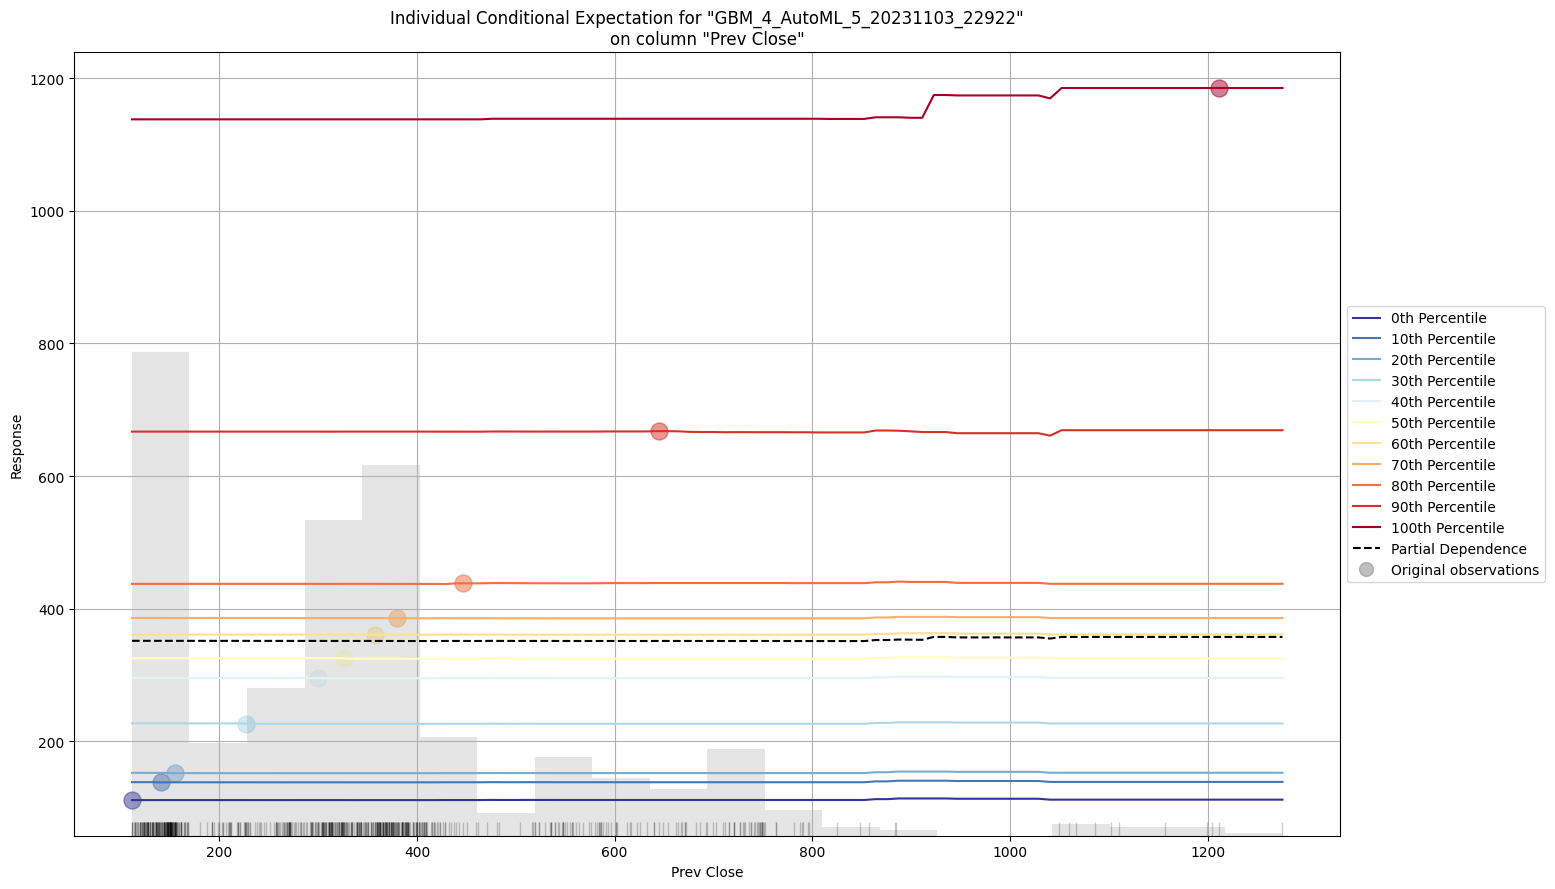

In [133]:
e = aml1.explain(test1)

# Observations after re-executing AutoML

* There is little improvement in the overall value of MAE (not very significant)
* The **Variable Importance** in addition to the previous featurs shows that **Prev Close** also has low impact in prediction
* The **Variable Importance Heatmap** also shows that most of the features selected while re-training have little more impact on the predictor
* Rest of the plots show similar results.

# Assumptions violat Check

In [135]:
#Seperating dependent and independent variable
A = data_ap1.drop(['Close'],axis=1)
B = data_ap1['Close']

In [136]:
from sklearn.model_selection import train_test_split

#Splitting the data
A_train,A_test,b_train,b_test=train_test_split(A,B,test_size=0.2,random_state=42)

In [152]:
# train the model
cols1 = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [139]:
# make prediction
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [142]:
# calculate Mean of Residuals
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.266711518868475e-12


<ipython-input-143-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


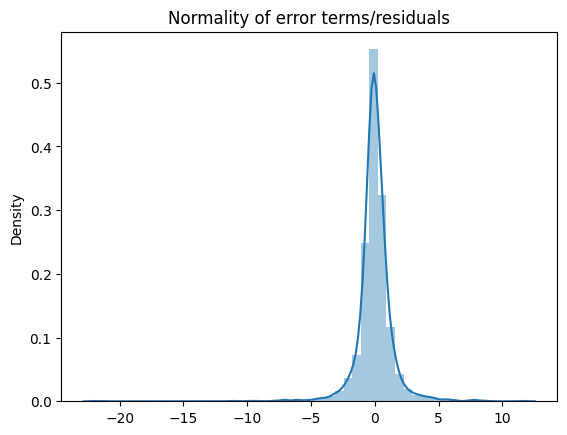

In [143]:
#get the distribution
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

While plotting a distplot it should show normal distrubution which is shown in the above figure

# Try Lasso Regularization

In [149]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Define the Lasso regularization model
lasso = H2OGeneralizedLinearEstimator(alpha=1, # L1 regularization
                                      lambda_=0.01, # Regularization strength
                                      family='gaussian',
                                      interaction_pairs=None,
                                      lambda_search=False,
                                      seed=1234)
predictors = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']
response = 'Close'
# Train the model using the training set
lasso.train(x=predictors, y=response, training_frame=train1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698961457014_62


GLM Model: summary
    family    link      regularization          number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 0.01 )  6                             3                              1                       train

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.8810705938078656
RMSE: 1.3715212699072026
MAE: 0.8380218726737634
RMSLE: 0.0033846449378180264
Mean Residual Deviance: 1.8810705938078656
R^2: 0.9999480285174289
Null degrees of freedom: 2338
Residual degrees of freedom: 2335
Null deviance: 84658429.99378526
Residual deviance: 4399.824118916597
AIC: 8125.670743398284

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2023-11-03 03:04:37  0.000 sec   0             84658429.71039763          36194.28375818625
    2023-11-03 03:04:37  0.012 sec   1                                                           1.3715212699072026  1.8810705938078656   0.8380218726737634  0.9999480285174289

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
Last        158.85                 1                    0.834801
VWAP        30.1759                0.189965             0.158583
Low         1.25902                0.00792582           0.00661648
Prev Close  0                      0                    0
Open        0                      0                    0
High        0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

From the above result we can see that the accuracy is similar before and after regularization i.e. the r2 value is close to 1. That means that regularization did not help in this case.

# Hyperparameter Tuning

In [155]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
# Define the response and predictor variables
predictors = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']
response = 'Close'
# Define the base model with default hyperparameters
base_model = H2ORandomForestEstimator(seed=1)

# Train the base model
base_model.train(x=predictors, y=response, training_frame=train1)

# Print the base model metrics on the test set
print(base_model.model_performance(test1))

# Define the hyperparameters to be tuned
hyper_params = {'ntrees': [50, 100, 150],
                'max_depth': [5, 10, 15],
                'min_rows': [5, 10, 15],
                'sample_rate': [0.6, 0.7, 0.8],
                'mtries': [2, 3, 4]}

# Define the grid search criteria
search_criteria = {'strategy': 'RandomDiscrete',
                   'max_models': 10,
                   'seed': 1}

# Perform grid search
grid = H2OGridSearch(model=H2ORandomForestEstimator(seed=1234),
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)

grid.train(x=predictors, y=response, training_frame=train, validation_frame=test)

# Print the grid search results
print(grid.get_grid(sort_by='rmse', decreasing=False))

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: drf
** Reported on test data. **

MSE: 23.816154007966578
RMSE: 4.880179710621995
MAE: 1.865603360584382
RMSLE: 0.007310632438956646
Mean Residual Deviance: 23.816154007966578
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing rmse
    max_depth    min_rows    mtries    ntrees    sample_rate    model_ids                                              rmse
--  -----------  ----------  --------  --------  -------------  -----------------------------------------------------  -------
    5            5           2         100       0.8            Grid_DRF_train_model_python_1698961457014_66_model_10  6.18813
    5            5           2         50        0.8            Grid_DRF_train_model_python_1698961457014_66_model_8   6.22542
    15           10          4         50     

In [156]:
# Retrieve the best model from the grid search
best_model = grid.get_grid(sort_by='rmse', decreasing=False)[0]

# Retrieve the values of the best hyperparameters
best_params = best_model.params

# Print the values of the best hyperparameters
for param_name in best_params:
    param_value = best_params[param_name]['actual']
    print(f'{param_name}: {param_value}')

model_id: {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_DRF_train_model_python_1698961457014_66_model_10', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_DRF_train_model_python_1698961457014_66_model_10'}
training_frame: {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'train', 'type': 'Key<Frame>', 'URL': '/3/Frames/train'}
validation_frame: {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'test', 'type': 'Key<Frame>', 'URL': '/3/Frames/test'}
nfolds: 0
keep_cross_validation_models: True
keep_cross_validation_predictions: False
keep_cross_validation_fold_assignment: False
score_each_iteration: False
score_tree_interval: 0
fold_assignment: None
fold_column: None
response_column: {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'Close', 'is_member_of_frames': None}
i

we can observe that ntrees, max_depth, min_rows, sample_rate, and mtries are the best parameters

# 1. Is the relationship significant?
Based on our analysis, there appears to be a significant relationship between the independent variables and the close price. This is supported by the high R-squared values we obtained in our models and the low root mean squared error (RMSE) values in our models.

# 2. Are any model assumptions violated?
We tested for assumptions of linear regression and the assumptions are not voilated tere is a noraml distribution as shown above

# 3. Is there any multicollinearity in the model?
Based on our correlation analysis, some of the independent variables had high correlations with each other, indicating the presence of multicollinearity.

# 4. In the multivariate models are predictor variables independent of all the other predictor variables?
Based on our analysis, there were some independent variables that had high correlations with each other, indicating that they were not completely independent.

# 5. In the multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
Based on our analysis, some of the most significant predictor variables were [ 'High', 'Low', 'Last', 'VWAP']

# 6. Does the model make sense?
Based on our analysis the Models make sence, the independent variables were related to the dependent variable. And the 3 models that we saw trained using H2o had good results and were showing relation between variables.

# 7. Does regularization help?
Based on our analysis regularization does not help in this case as there was no significant change in the model result after regularization.

# 8. Which independent variables are significant?
Based on our analysis the independent variables that are significant are [ 'High', 'Low', 'Last', 'VWAP'].

# 9. Which hyperparameters are important?
Based on our analysis important hyperparameters include ntrees, max_depth, min_rows, sample_rate, and mtries

# 10. Coding professionalism?
yes

# Conclusion
In conclusion, we have performed AutoML using H2O library on the Stock dataset. We used various algorithms to predict the close price of stock on its features.

After evaluating the models using various metrics, we found that the H2O AutoML model with regularization and without regularization provided a similar performance. The most significant predictor variables in the final model were 'High', 'Low', 'Last', 'VWAP'.

We also found that there was no violation of model assumptions, and multicollinearity was not a significant issue.

Overall, in all the models returned by AutoML we observed that there was similar performance and the MAE was set as the deciding factor in the best model given that all the models make sense.

# References

https://towardsdatascience.com/python-automl-sklearn-fd85d3b3c5e

https://towardsdatascience.com/democratising-machine-learning-with-h2o-7f2f79e10e3f

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html

https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML

## MIT License

Copyright (c) 2023 Anshul Chaudhary

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.